In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
datasetArray = []
visualiseDataSets = True
def create_df_from_sheet(sheet: str) -> pd.DataFrame:
    df = pd.read_excel("./all data(from manon).xlsx", sheet_name=sheet)
    df.columns = df.iloc[1]
    df = df.iloc[2:]
    if len(df.columns) > 4:
        df.drop(columns=df.columns[-2:], axis=1, inplace=True)
    df.columns = ["timestamp", "no_units", "RangeCAL_uS", "SkinResistanceCAL_kOhms"]

    df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y/%m/%d %H:%M:%S.%f') # change the string formatted times to pandas datetime
 
    df['timestamp'] = df.timestamp-df.timestamp[2] # convert the time to relative from the start of the measurements

    # print(df['timestamp'])
    datasetArray.append(df)
    return df


def plot_df(df: pd.DataFrame):
    if visualiseDataSets:
        df.iloc[:, [0, 1]].plot(x='timestamp', ylim=[0,3.1],xlabel='Time', ylabel='Calibration mode', rot=45)
        df.iloc[:, [0, 2]].plot(x='timestamp', xlabel='Time', ylabel='Galvanic skin response', rot=45)
        df.iloc[:, [0, 3]].plot(x='timestamp', xlabel='Time', ylabel='Skin resistance', rot=45)
        # print("hi mom")



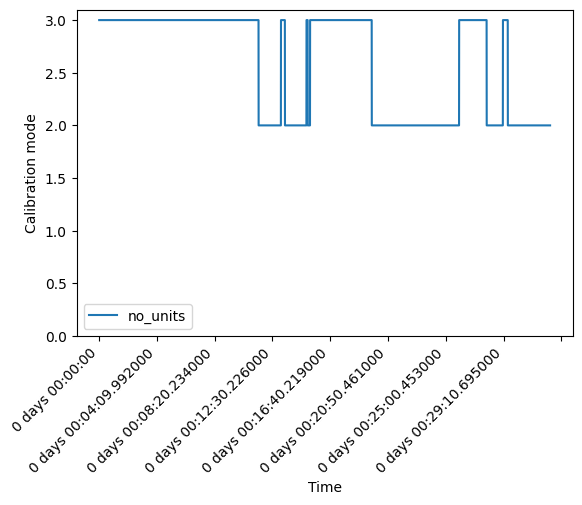

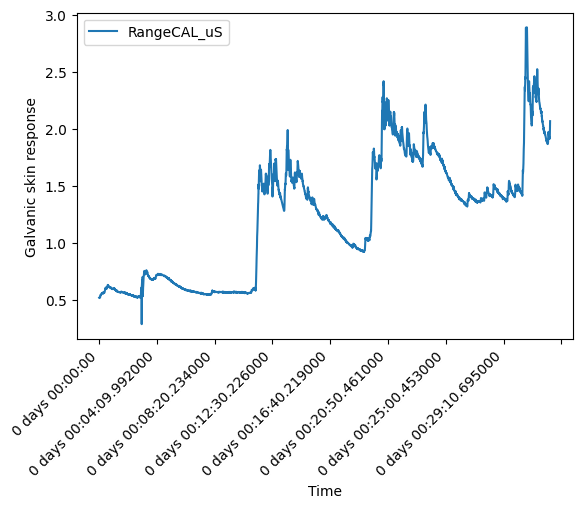

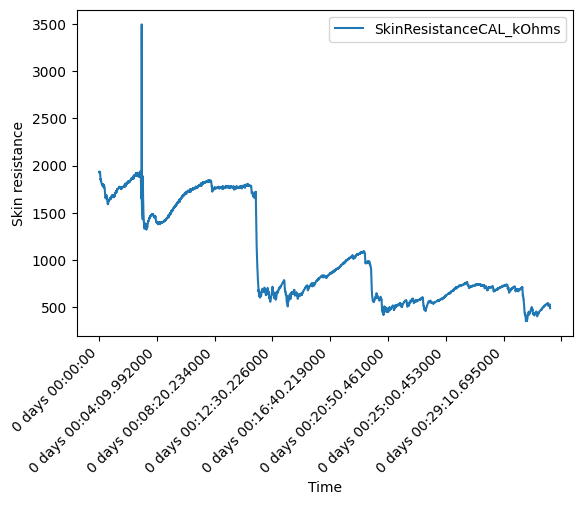

In [2]:
test612_1 = create_df_from_sheet("612_1")
plot_df(test612_1)

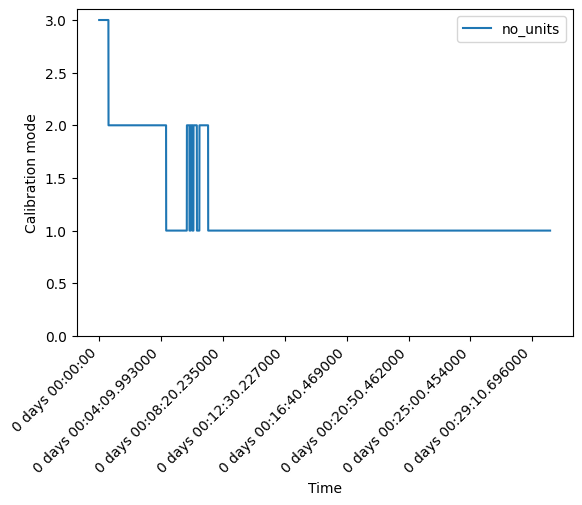

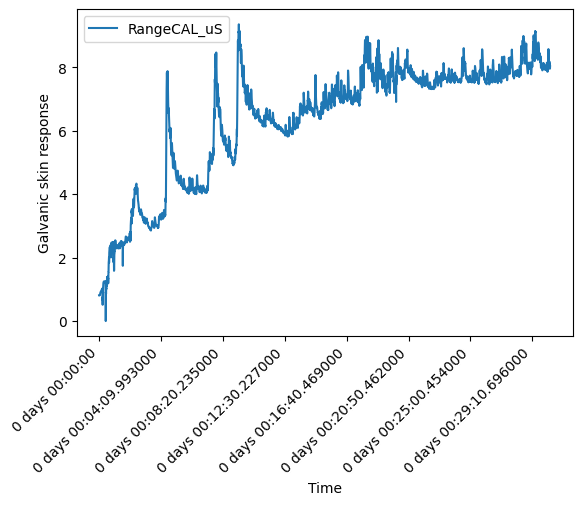

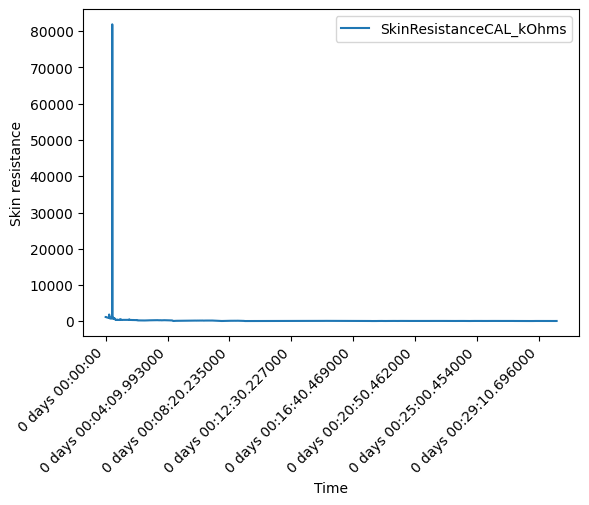

In [3]:
test612_2 = create_df_from_sheet("612_2")
plot_df(test612_2)

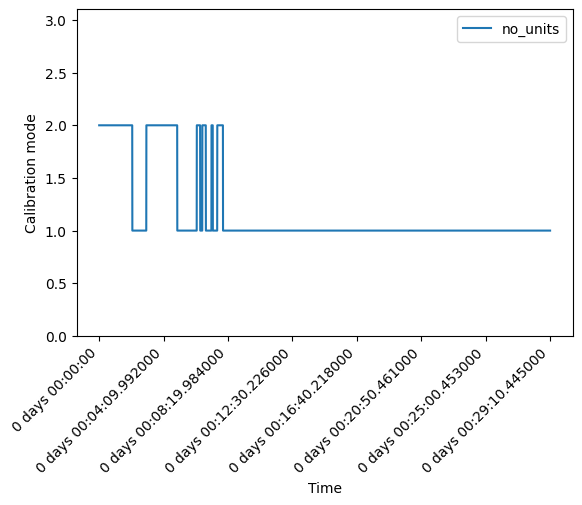

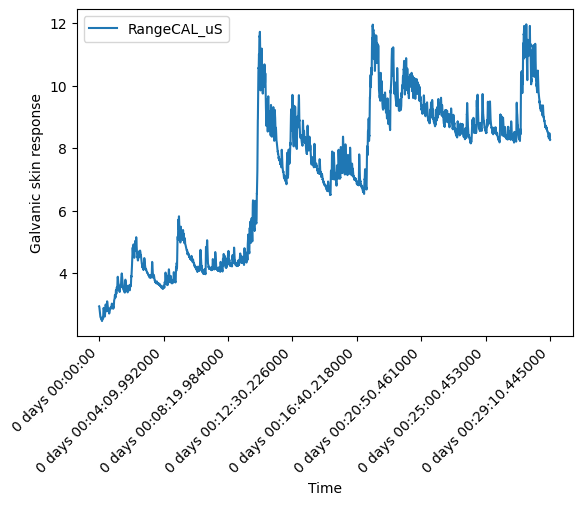

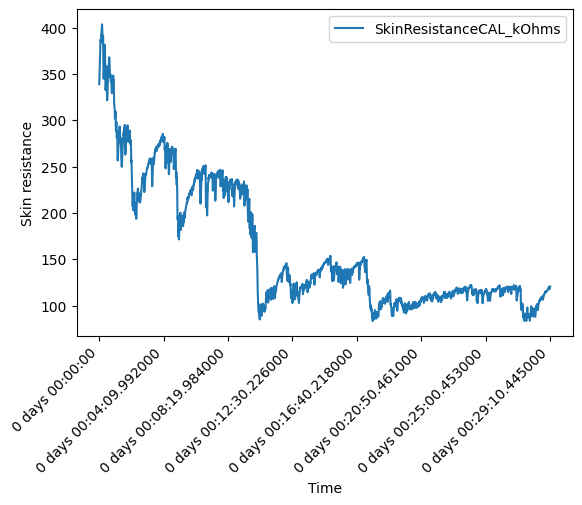

In [4]:
test612_3 = create_df_from_sheet("612_3")
plot_df(test612_3)

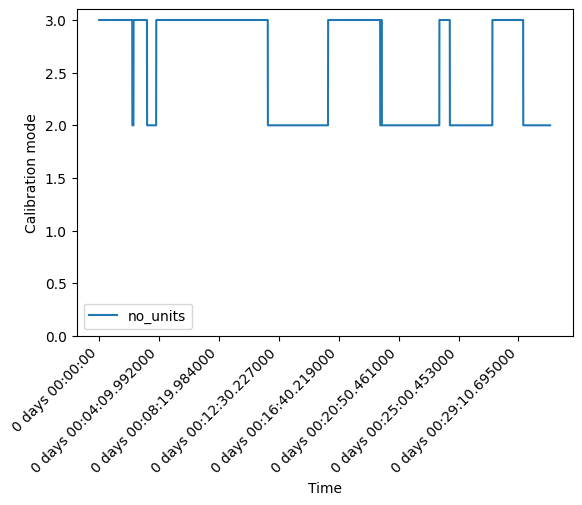

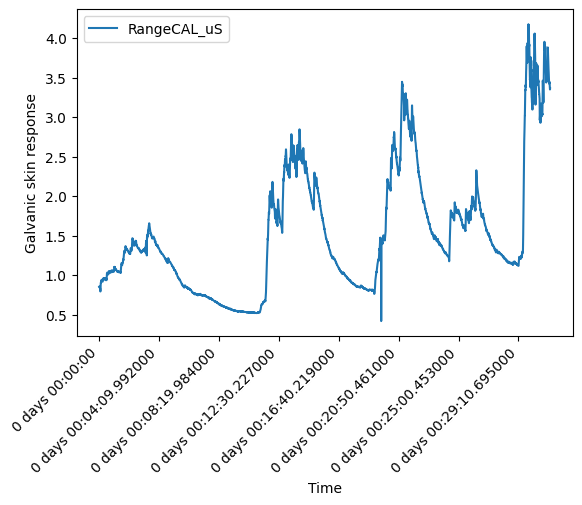

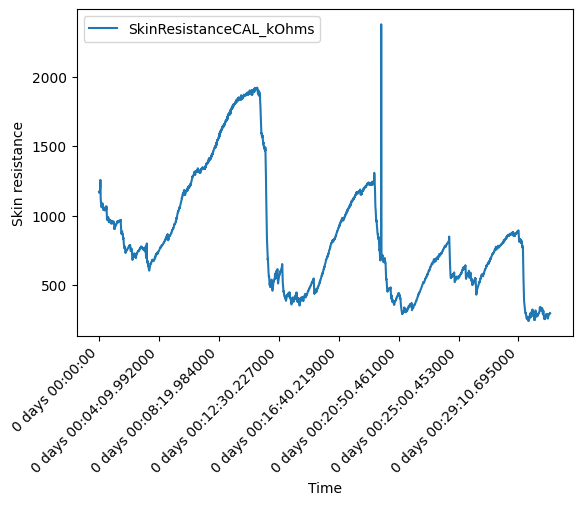

In [5]:
test612_4 = create_df_from_sheet("612_4")
plot_df(test612_4)

In [6]:
## BAD DATA SET
# lots of noise and no clear correlation with the tests that occurred.
# test612_5 = create_df_from_sheet("612_5")
# plot_df(test612_5)

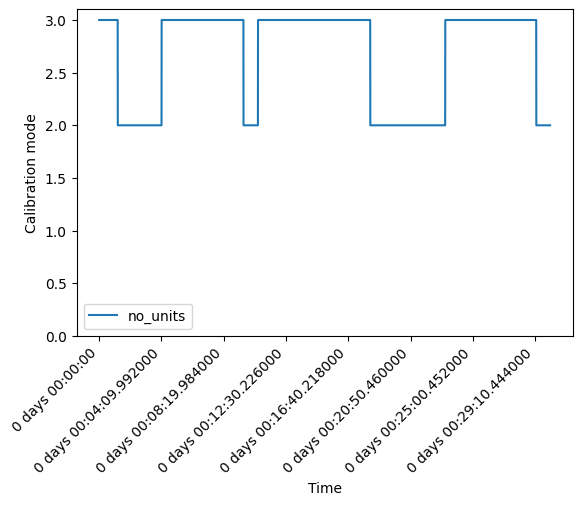

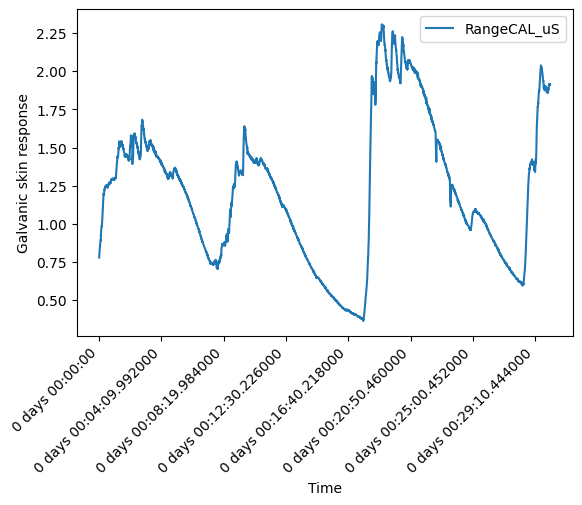

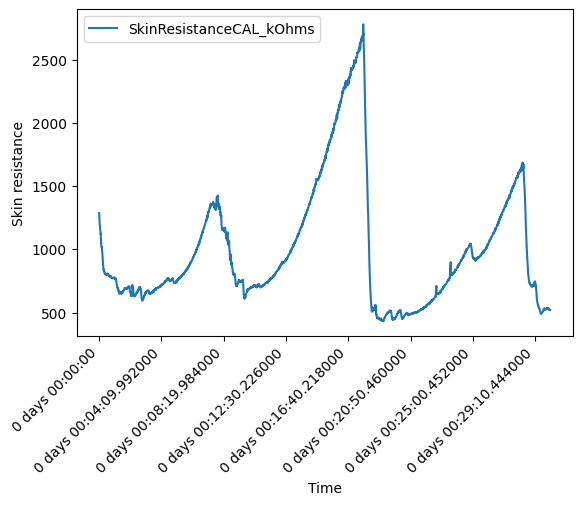

In [7]:
test612_6 = create_df_from_sheet("612_6")
plot_df(test612_6)

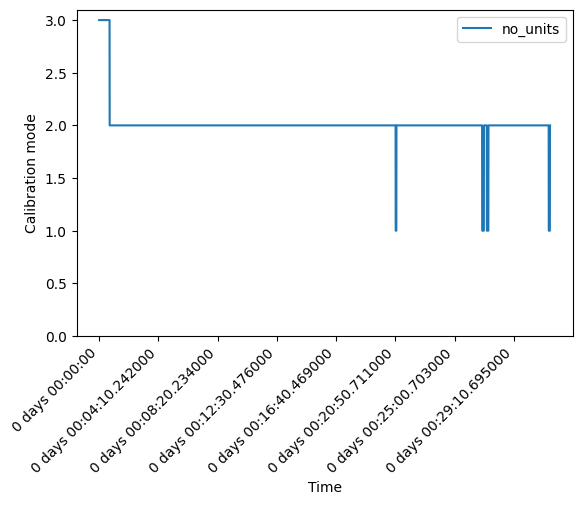

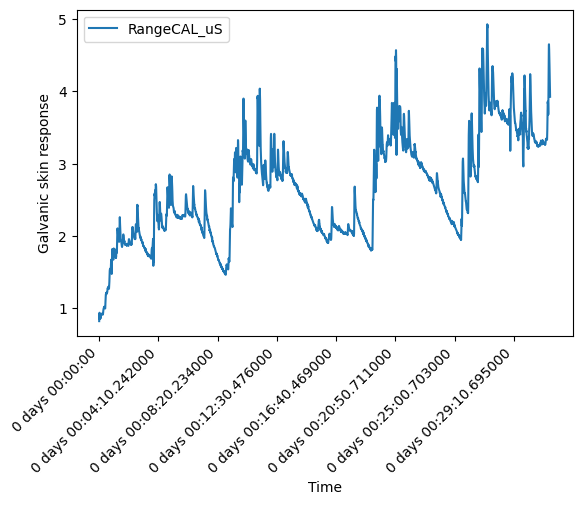

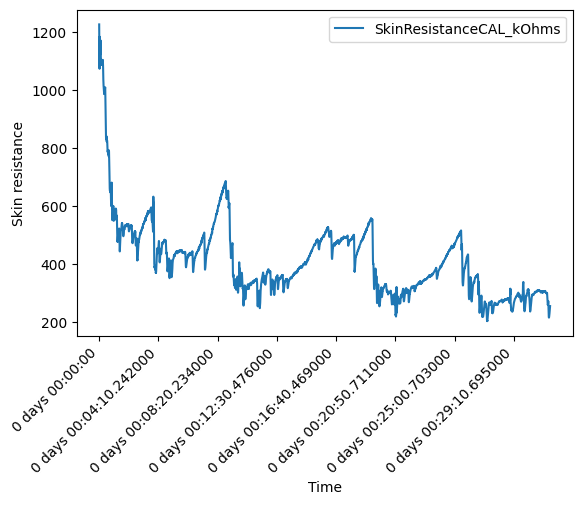

In [8]:
test612_7 = create_df_from_sheet("612_7")
plot_df(test612_7)

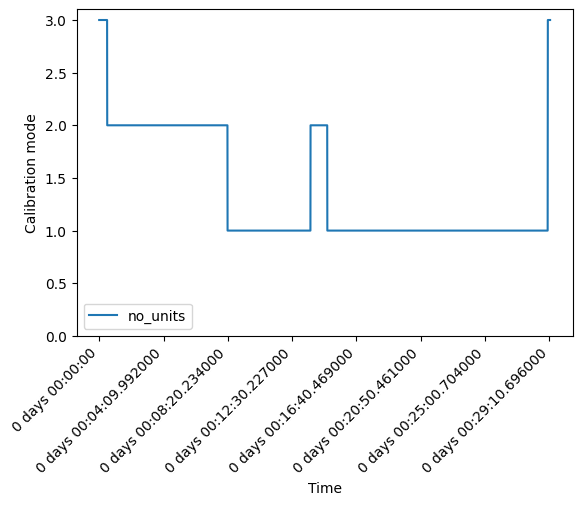

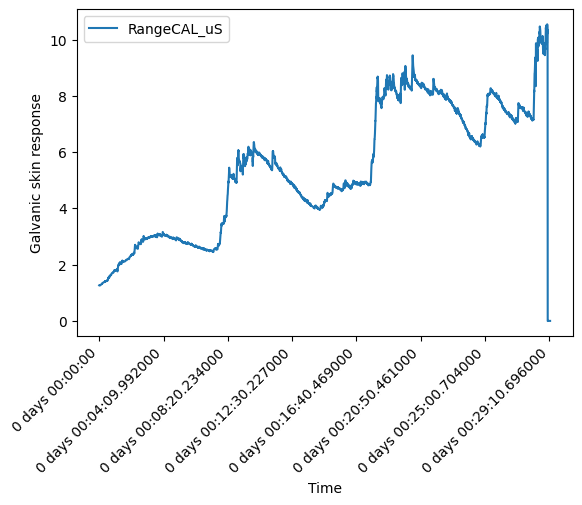

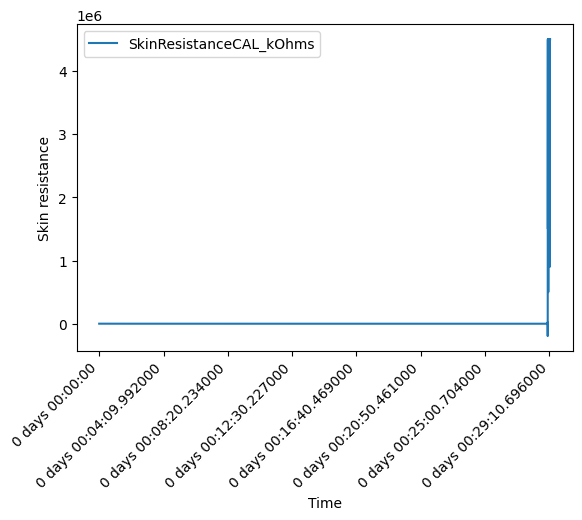

In [9]:
test712_1 = create_df_from_sheet("712_1")
plot_df(test712_1)

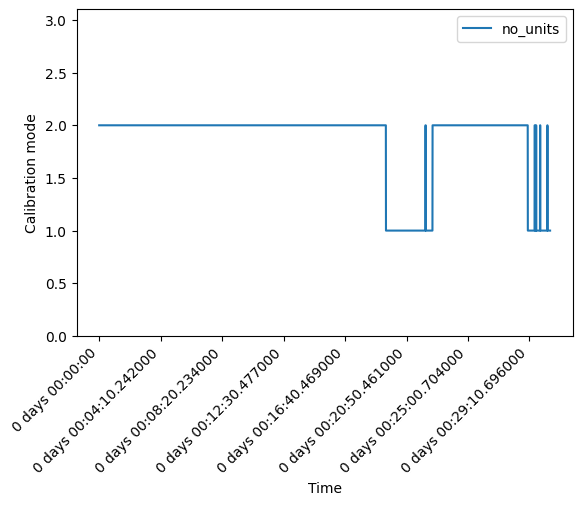

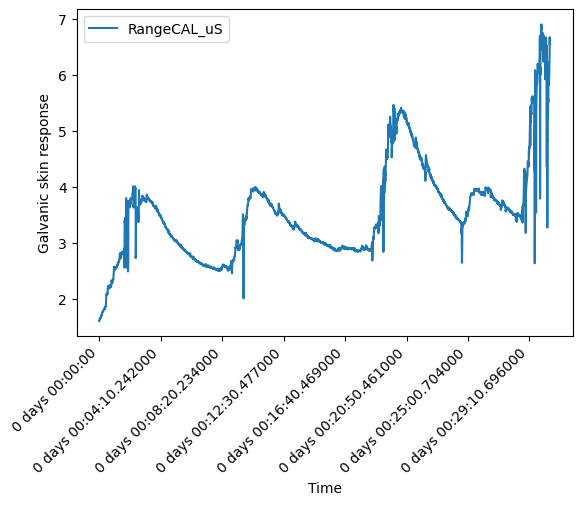

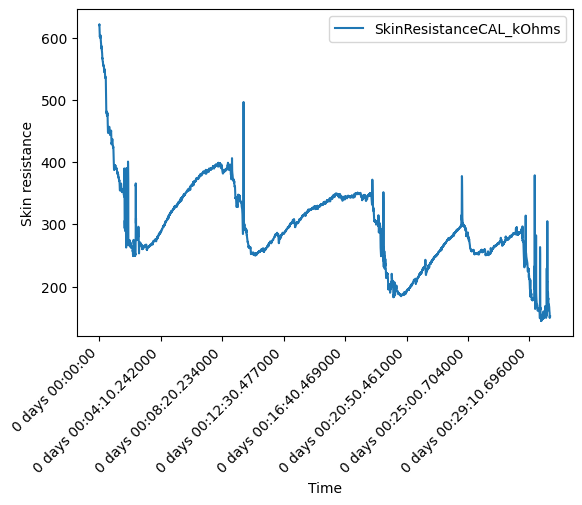

In [10]:
test712_2 = create_df_from_sheet("712_2")
plot_df(test712_2)

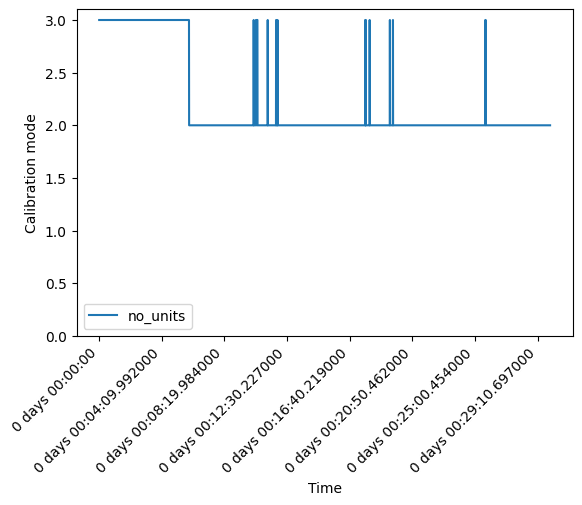

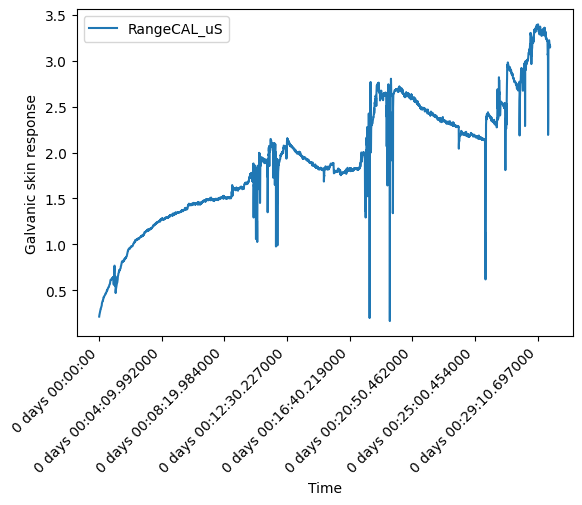

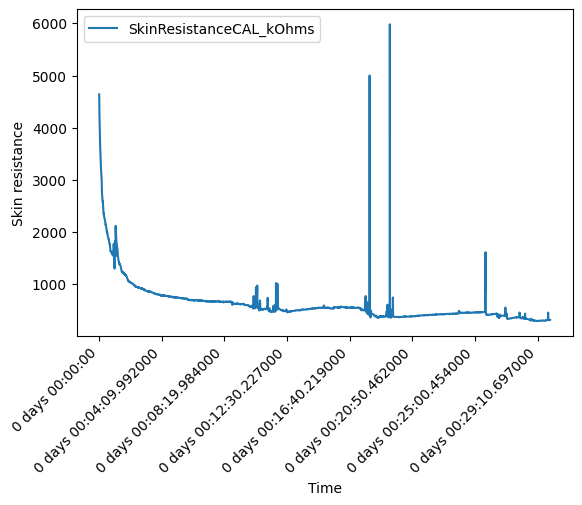

In [11]:
test712_3 = create_df_from_sheet("712_3")
plot_df(test712_3)

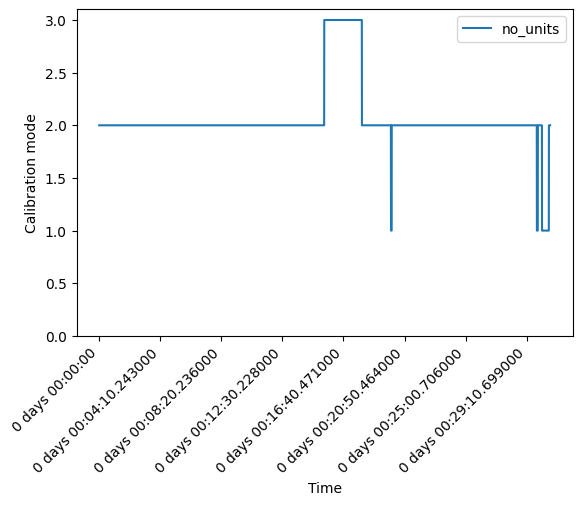

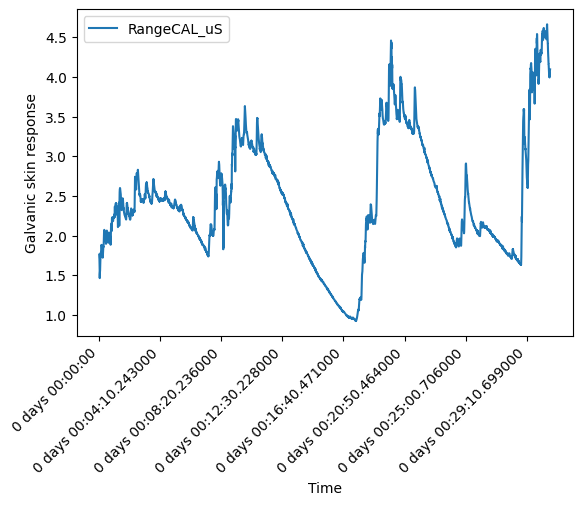

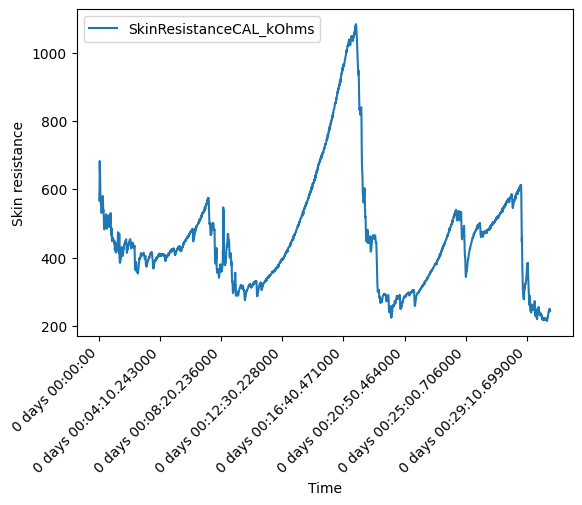

In [12]:
test712_4 = create_df_from_sheet("712_4")
plot_df(test712_4)

In [13]:
# test712_5 = create_df_from_sheet("712_5")
# plot_df(test712_5)

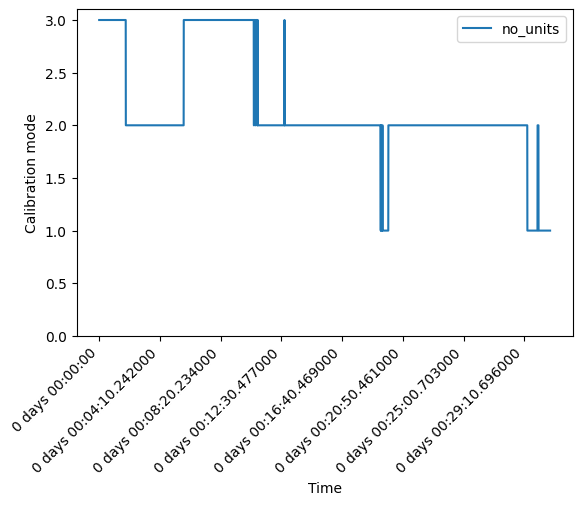

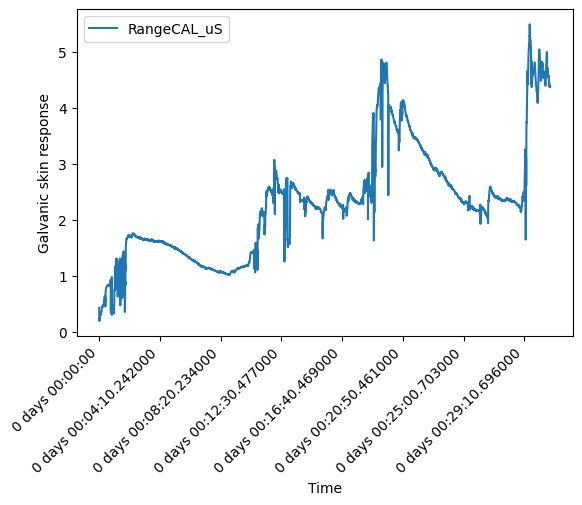

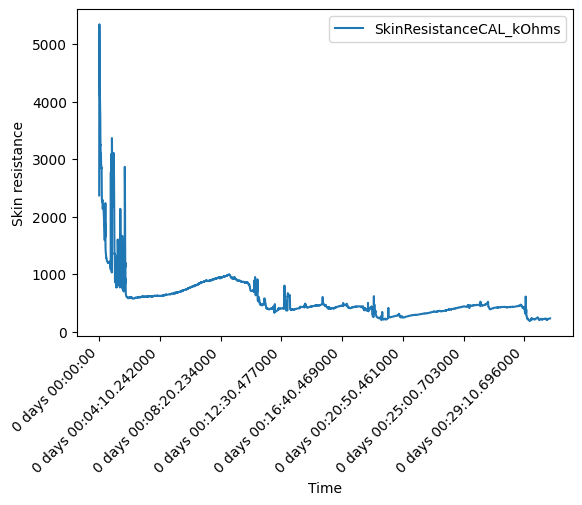

In [14]:
test712_6 = create_df_from_sheet("712_6")
plot_df(test712_6)

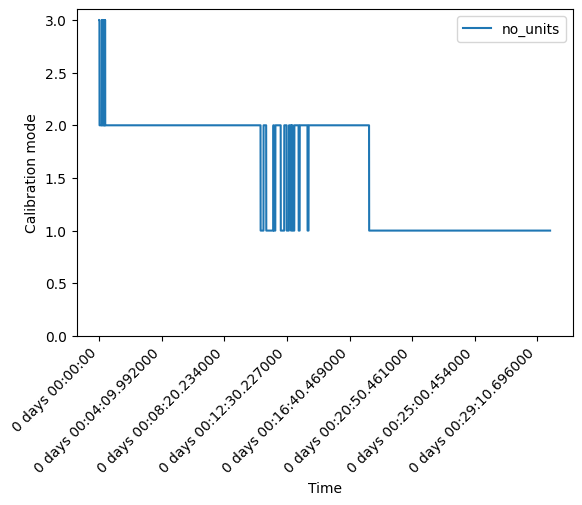

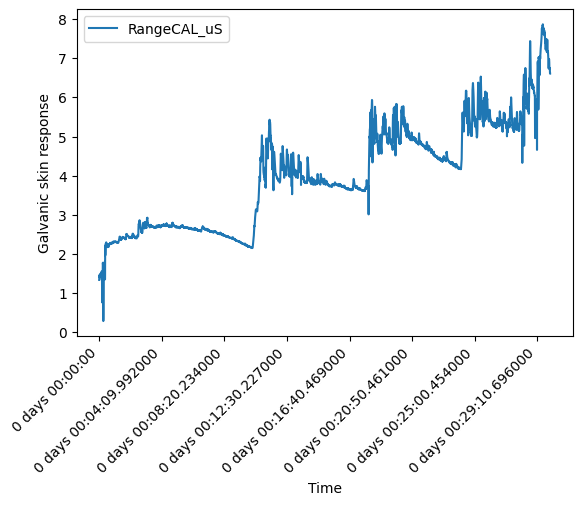

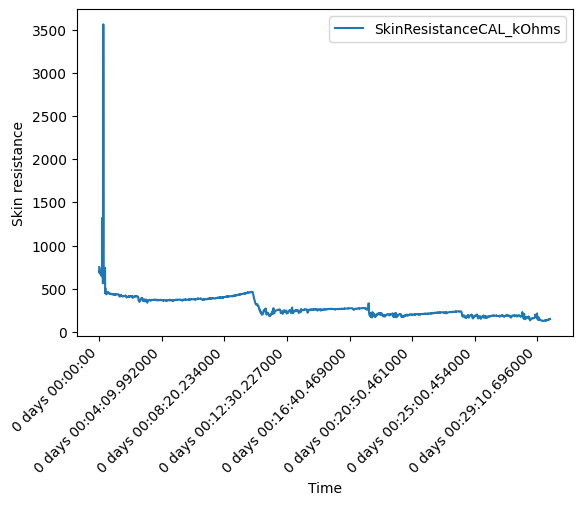

In [15]:
test712_7 = create_df_from_sheet("712_7")
plot_df(test712_7)

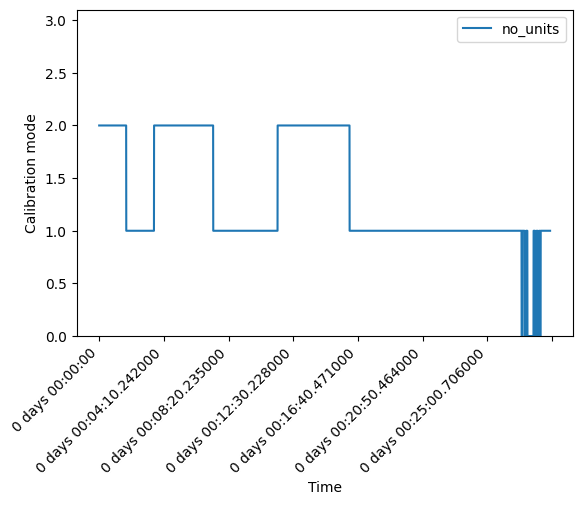

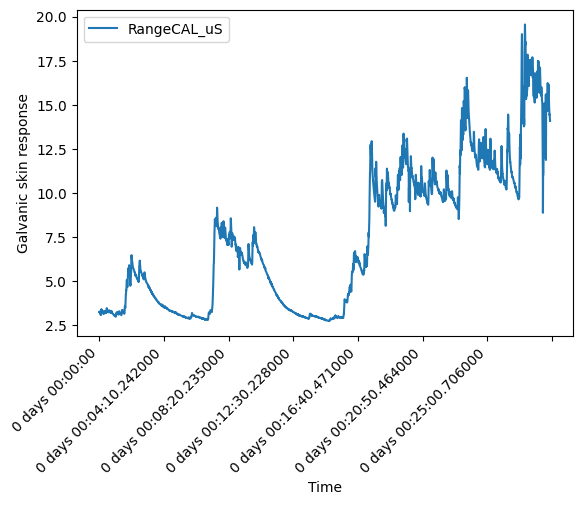

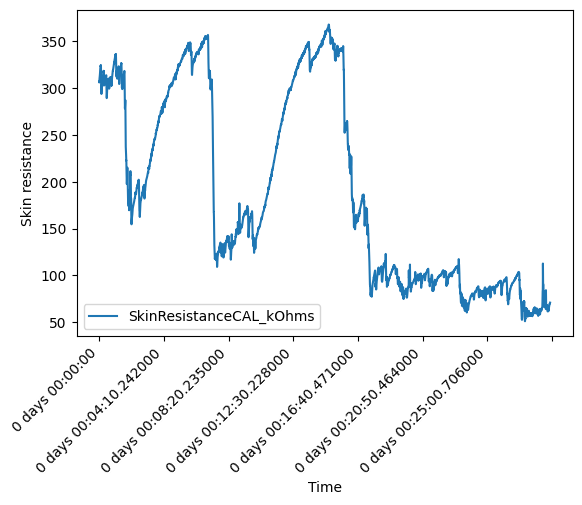

In [16]:
test712_8 = create_df_from_sheet("712_8")
plot_df(test712_8)

# random starts here
Run cells below again with "random_dataset = True" to get a random dataset which was loaded in with the "create_df_from_sheet" function. If not set to true, it is possible to manually change the dataset.

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

random_dataset = True

dfTemp= test612_1#datasetArray[0]
if(random_dataset):
    dfTemp =  np.random.choice(datasetArray)
    print(type(dfTemp))

dfTemp['RangeCAL_uS'] = scaler.fit_transform(dfTemp[['RangeCAL_uS']])

# df1_1 = dfTemp.iloc[:, [0, 1]] # calibration value, unused
df1_2 = dfTemp.iloc[:, [0, 2]]
# df1_3 = dfTemp.iloc[:, [0, 3]] # secondary sensor with basically the same values as the first, but with inverted values. unused.
df1_2

<class 'pandas.core.frame.DataFrame'>


/tmp/ipykernel_439/1638559089.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dfTemp =  np.random.choice(datasetArray)


,timestamp,RangeCAL_uS
2,0 days 00:00:00,0.049703
3,0 days 00:00:00.250000,0.049394
4,0 days 00:00:00.500000,0.048159
5,0 days 00:00:00.750000,0.046616
6,0 days 00:00:01,0.044300
...,...,...
6999,0 days 00:29:09.695000,0.615452
7000,0 days 00:29:09.945000,0.612763
7001,0 days 00:29:10.195000,0.611150
7002,0 days 00:29:10.445000,0.609536


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7002 entries, 2 to 7003
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   timestamp    7002 non-null   timedelta64[ns]
 1   RangeCAL_uS  7002 non-null   float64        
dtypes: float64(1), timedelta64[ns](1)
memory usage: 109.5 KB


/tmp/ipykernel_439/745325839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_2['RollingMean'] = df1_2['RangeCAL_uS'].rolling(40).mean() # rolling average of 10 seconds (4 units = 1 second)


<AxesSubplot: xlabel='Time', ylabel='Scaled sensor value'>

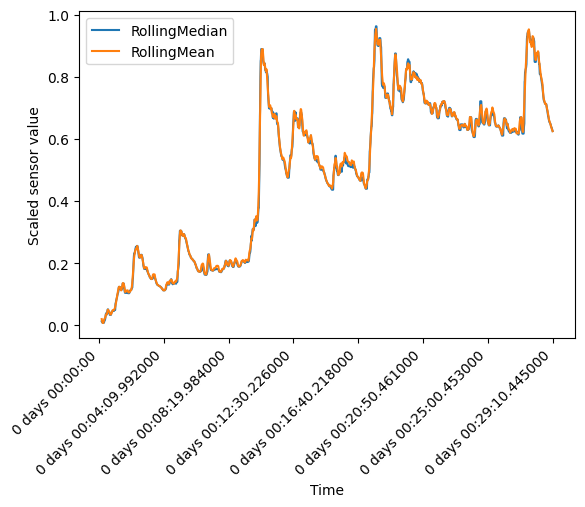

In [18]:
df1_2.info()
df1_2['RollingMean'] = df1_2['RangeCAL_uS'].rolling(40).mean() # rolling average of 10 seconds (4 units = 1 second)
df1_2['RollingMedian'] = df1_2['RangeCAL_uS'].rolling(40).median() # rolling median of 10 seconds
df1_2['deltaMean'] = df1_2.RollingMean.diff(periods =1)
df1_2['deltaMedian'] = df1_2.RollingMedian.diff(periods =1)
df1_2[['RollingMedian', 'RollingMean','timestamp']].plot(x='timestamp', xlabel='Time', ylabel='Scaled sensor value', rot=45)

In [19]:
anomaly_detection_df = df1_2[['timestamp', 'deltaMean', 'RollingMean']].copy().dropna()
anomaly_detection_df = anomaly_detection_df.reset_index()
# anomaly_detection_df['time_index'] = anomaly_detection_df.index
anomaly_detection_df

,index,timestamp,deltaMean,RollingMean
0,42,0 days 00:00:10,-0.001169,0.019163
1,43,0 days 00:00:10.250000,-0.001181,0.017983
2,44,0 days 00:00:10.500000,-0.001169,0.016813
3,45,0 days 00:00:10.750000,-0.001154,0.015660
4,46,0 days 00:00:11,-0.001108,0.014552
...,...,...,...,...
6957,6999,0 days 00:29:09.695000,-0.000578,0.627782
6958,7000,0 days 00:29:09.945000,-0.000645,0.627136
6959,7001,0 days 00:29:10.195000,-0.000686,0.626451
6960,7002,0 days 00:29:10.445000,-0.000740,0.625711


In [20]:
# from sklearn.ensemble import IsolationForest

# IF = IsolationForest(random_state=0, contamination=0.05, n_estimators=200, max_samples=0.7)
# model_data = anomaly_detection_df[['deltaMean']]
# IF.fit(model_data)

# anomaly_detection_df['scores']=IF.decision_function(model_data)
# anomaly_detection_df['anomaly']=IF.predict(model_data)

# anomaly=anomaly_detection_df.loc[anomaly_detection_df['anomaly']==-1]
# anomaly_index=list(anomaly.index)

# print(anomaly)
# # print(anomaly_index)

# anomaly_detection_df[['anomaly', 'RollingMean','deltaMean']].plot(x='timestamp', xlabel='Time', ylabel='', rot=45)

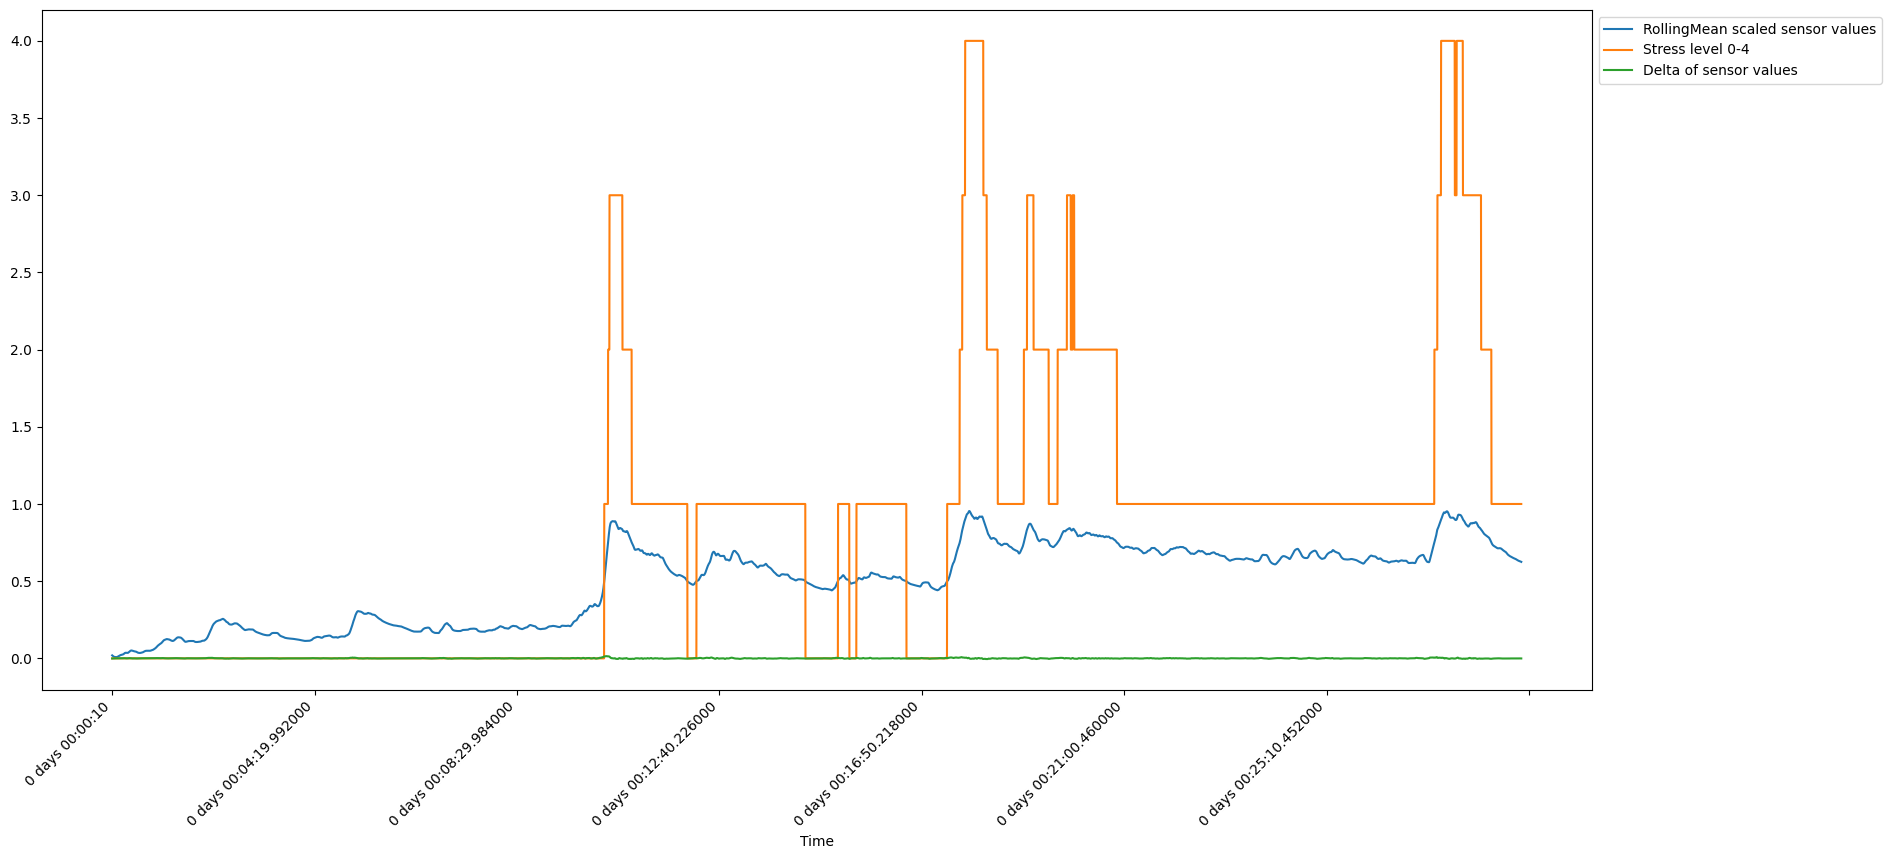

In [21]:
from sklearn.model_selection import train_test_split
stress_level = anomaly_detection_df[['RollingMean', 'deltaMean', 'timestamp']]

for index, row in stress_level.iterrows():
    if (row[0] > 0.2):
        stress_level.loc[index, 'stressLevel'] = 0
    if (row[0] > 0.4):
        stress_level.loc[index, 'stressLevel'] = 1
    if (row[0] > 0.6):
        stress_level.loc[index, 'stressLevel'] = 2
    if (row[0] > 0.8):
        stress_level.loc[index, 'stressLevel'] = 3
    if (row[0] > 0.9):
        stress_level.loc[index, 'stressLevel'] = 4


stress_level['stressLevel'] = stress_level['stressLevel'].fillna(0)
stress_level['weighted'] = (stress_level['stressLevel'] * stress_level['RollingMean']).round(0)

stress_level[['RollingMean', 'weighted', 'deltaMean', 'timestamp']].plot(x='timestamp', xlabel='Time', rot=45, figsize=[20, 10])
plt.legend(['RollingMean scaled sensor values','Stress level 0-4','Delta of sensor values'],bbox_to_anchor=(1.0, 1.0))
# stress_level[['stressed','weighted']].plot(x='timestamp', xlabel='Time', ylabel='', rot=45)
model_data = stress_level[['weighted']]
# print(stress_level)

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(
    stress_level[['RollingMean', 'deltaMean']], model_data, test_size=0.25)


In [22]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

# comment these out to verify other datasets
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=2)
tree_clf.fit(X_train_data,y_train_data)

# tree.plot_tree(tree_clf);
y_pred_t = tree_clf.predict(X_test_data)
accuracy_score(y_test_data, y_pred_t)

0.9385410683515221

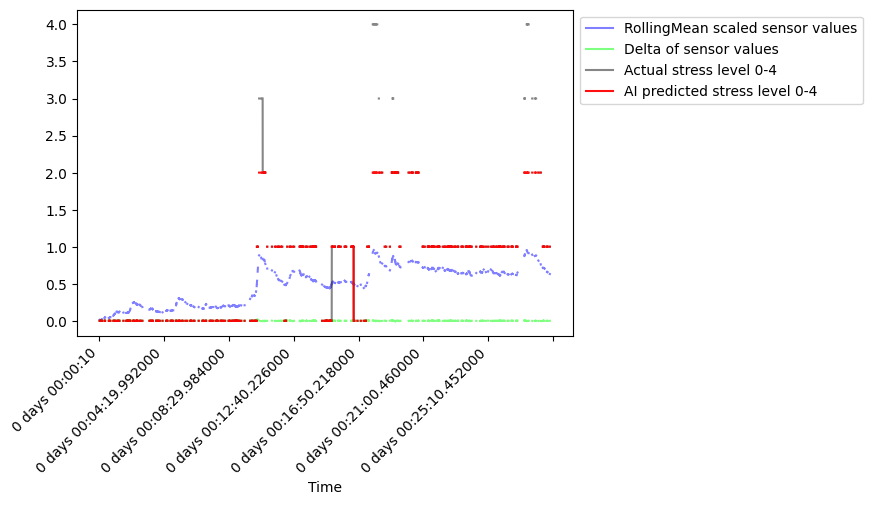

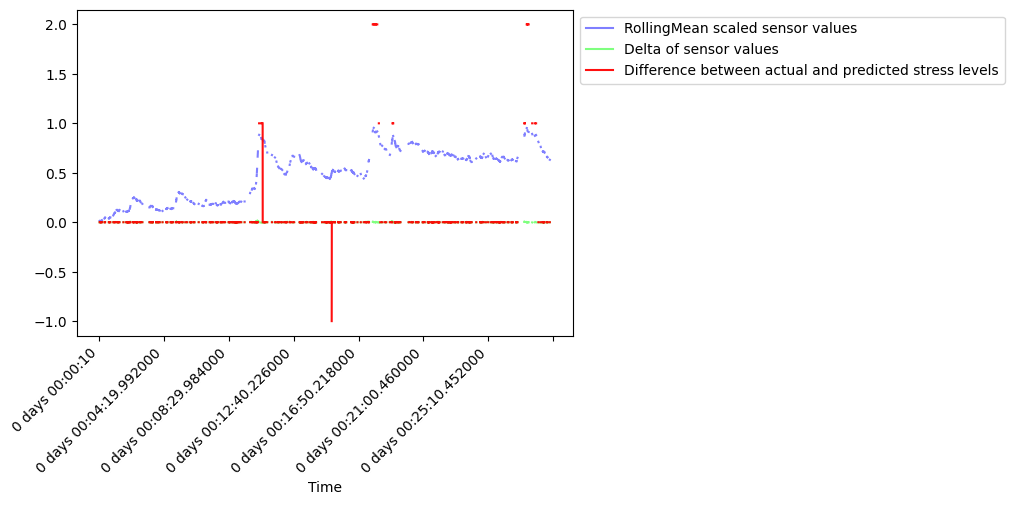

In [23]:
resultPlot = X_test_data.copy()
resultPlot['result']= y_pred_t.copy()
resultPlot['expected']=y_test_data.copy()

resultPlot = resultPlot.sort_index()
resultPlot_ = resultPlot
for i in resultPlot.iterrows():
    # print(i[0])
    resultPlot_.loc[i[0]]=i[1]
# resultPlot_ = resultPlot_.ffill()

# resultPlot_.reset_index()
# print(resultPlot_)x.resample('D')
resultPlot_2 = resultPlot_.sort_index().reindex(pd.RangeIndex(resultPlot_.index.max() + 1))#.ffill()
resultPlot_2['timestamp']= stress_level['timestamp']
resultPlot_2['errorMargin'] = resultPlot_2['expected']-resultPlot_2['result']
resultPlot_2[['RollingMean','deltaMean','expected', 'result', 'timestamp']].plot(x='timestamp',xlabel='Time', ylabel='', rot=45, style={'RollingMean': '#0000ff80', 'deltaMean': '#00ff0080', 'expected':'#0f0f0f80', 'result':'#ff0000f0'})#, figsize=[20,10])
plt.legend(['RollingMean scaled sensor values','Delta of sensor values','Actual stress level 0-4','AI predicted stress level 0-4'],bbox_to_anchor=(1.0, 1.0))
resultPlot_2[['RollingMean','deltaMean','errorMargin','timestamp']].plot(x='timestamp', xlabel='Time', ylabel='', rot=45, style={'RollingMean': '#0000ff80', 'deltaMean': '#00ff0080','errorMargin':'#ff0000f0'})#, figsize=[20,10])
plt.legend(['RollingMean scaled sensor values','Delta of sensor values','Difference between actual and predicted stress levels'],bbox_to_anchor=(1.0, 1.0))

In [24]:
from sklearn.ensemble import RandomForestClassifier

# comment these out to verify other datasets
forest_clf = RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_split=2, n_estimators = 50)
forest_clf.fit(X_train_data,y_train_data)

y_pred_f = forest_clf.predict(X_test_data)
accuracy_score(y_test_data, y_pred_f)

/tmp/ipykernel_439/1331429872.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_clf.fit(X_train_data,y_train_data)


0.8816771970132108

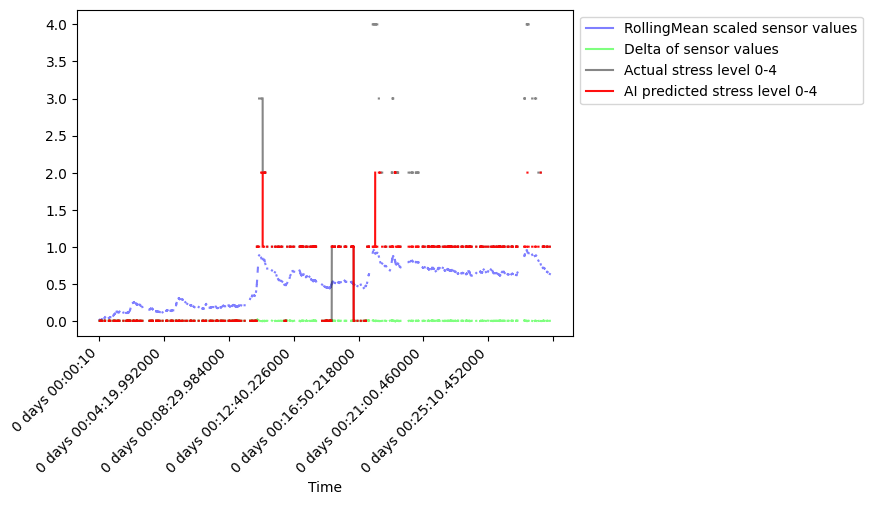

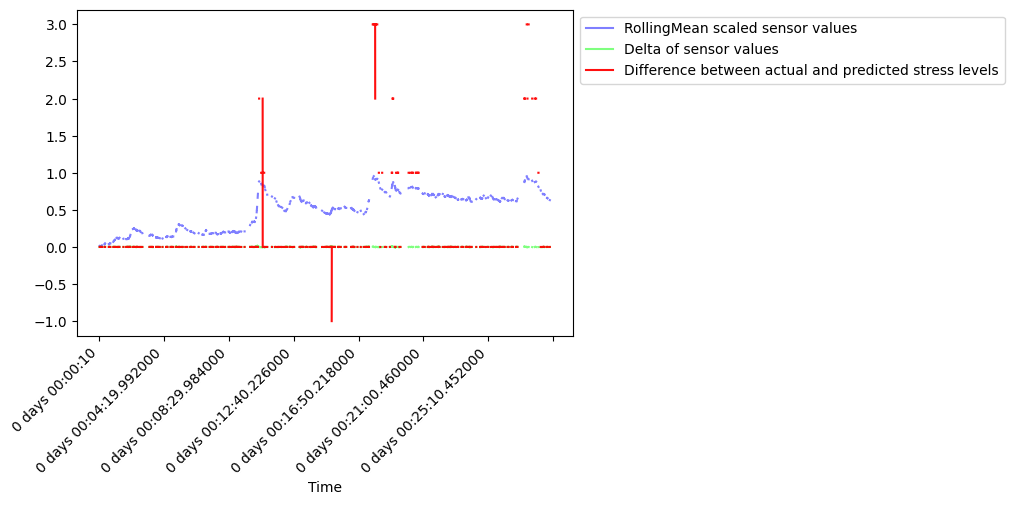

In [25]:
resultPlot = X_test_data.copy()
resultPlot['result']= y_pred_f.copy()
resultPlot['expected']=y_test_data.copy()

resultPlot = resultPlot.sort_index()
resultPlot_ = resultPlot
for i in resultPlot.iterrows():
    # print(i[0])
    resultPlot_.loc[i[0]]=i[1]
# resultPlot_ = resultPlot_.ffill()

# resultPlot_.reset_index()
# print(resultPlot_)x.resample('D')
resultPlot_2 = resultPlot_.sort_index().reindex(pd.RangeIndex(resultPlot_.index.max() + 1))#.ffill()
resultPlot_2['timestamp']= stress_level['timestamp']
resultPlot_2['errorMargin'] = resultPlot_2['expected']-resultPlot_2['result']
resultPlot_2[['RollingMean','deltaMean','expected', 'result', 'timestamp']].plot(x='timestamp',xlabel='Time', ylabel='', rot=45, style={'RollingMean': '#0000ff80', 'deltaMean': '#00ff0080', 'expected':'#0f0f0f80', 'result':'#ff0000f0'})#, figsize=[20,10])
plt.legend(['RollingMean scaled sensor values','Delta of sensor values','Actual stress level 0-4','AI predicted stress level 0-4'],bbox_to_anchor=(1.0, 1.0))
resultPlot_2[['RollingMean','deltaMean','errorMargin','timestamp']].plot(x='timestamp', xlabel='Time', ylabel='', rot=45, style={'RollingMean': '#0000ff80', 'deltaMean': '#00ff0080','errorMargin':'#ff0000f0'})#, figsize=[20,10])
plt.legend(['RollingMean scaled sensor values','Delta of sensor values','Difference between actual and predicted stress levels'],bbox_to_anchor=(1.0, 1.0))

In [26]:
# arima or sarima ->
# look at different model types

# ARIMA exploration
In this part we will explore if the ARIMA time series model is suitable for our use cases by following [this tutorial](https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3).

## Why ARIMA/SARIMA
This algorithm was suggested by Georgiana based on our data, as she noticed repeating patterns with an increasing trend.

In [81]:
import numpy as np
import pandas as pd
import warnings
import itertools
import statsmodels
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('statsmodels version:', statsmodels.__version__)
print('matplotlib version:', matplotlib.__version__)

%matplotlib inline

numpy version: 1.23.4
pandas version: 1.5.1
statsmodels version: 0.13.5
matplotlib version: 3.6.2


## Preparing the data

## Loading the dataset

In [82]:
# df_co2 = pd.DataFrame(sm.datasets.co2.load().data) # we'll use our own dataset instead

In [83]:
import datetime
# startTime = datetime.datetime.today()
startTime=pd.to_datetime(0)
print(startTime)
df_co2= test612_1.copy()#datasetArray[0]
# if(random_dataset):
#     df_co2 =  np.random.choice(datasetArray).copy()
#     # print(type(df_co2))
df_co2['date'] = startTime + df_co2.timestamp
# df_co2['date'] = pd.to_datetime(df_co2.timestamp.apply(lambda x: x.decode("utf-8")))

df_co2.set_index('date',inplace=True)
df_co2.drop(['timestamp', 'no_units', 'SkinResistanceCAL_kOhms'], axis=1, inplace=True)


1970-01-01 00:00:00


In [84]:
df_co2.head(5)

,RangeCAL_uS
date,
1970-01-01 00:00:00.000,0.517483
1970-01-01 00:00:00.250,0.517927
1970-01-01 00:00:00.500,0.518815
1970-01-01 00:00:00.750,0.519259
1970-01-01 00:00:01.000,0.520147


In [85]:
df_co2.tail(5)

,RangeCAL_uS
date,
1970-01-01 00:32:30.939,1.94359
1970-01-01 00:32:31.189,1.977289
1970-01-01 00:32:31.439,2.015385
1970-01-01 00:32:31.689,2.041758
1970-01-01 00:32:31.939,2.065201


In [86]:
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7806 entries, 1970-01-01 00:00:00 to 1970-01-01 00:32:31.939000
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   RangeCAL_uS  7806 non-null   object
dtypes: object(1)
memory usage: 122.0+ KB


In [87]:
df_co2.describe()

,RangeCAL_uS
count,7806.000000
unique,1987.000000
top,0.566767
freq,60.000000


###
apparently this is a requirement for this model

In [88]:
df_co2.index

DatetimeIndex([       '1970-01-01 00:00:00', '1970-01-01 00:00:00.250000',
               '1970-01-01 00:00:00.500000', '1970-01-01 00:00:00.750000',
                      '1970-01-01 00:00:01', '1970-01-01 00:00:01.250000',
               '1970-01-01 00:00:01.500000', '1970-01-01 00:00:01.750000',
                      '1970-01-01 00:00:02', '1970-01-01 00:00:02.250000',
               ...
               '1970-01-01 00:32:29.689000', '1970-01-01 00:32:29.939000',
               '1970-01-01 00:32:30.189000', '1970-01-01 00:32:30.439000',
               '1970-01-01 00:32:30.689000', '1970-01-01 00:32:30.939000',
               '1970-01-01 00:32:31.189000', '1970-01-01 00:32:31.439000',
               '1970-01-01 00:32:31.689000', '1970-01-01 00:32:31.939000'],
              dtype='datetime64[ns]', name='date', length=7806, freq=None)

## Analysing and visualising the data   

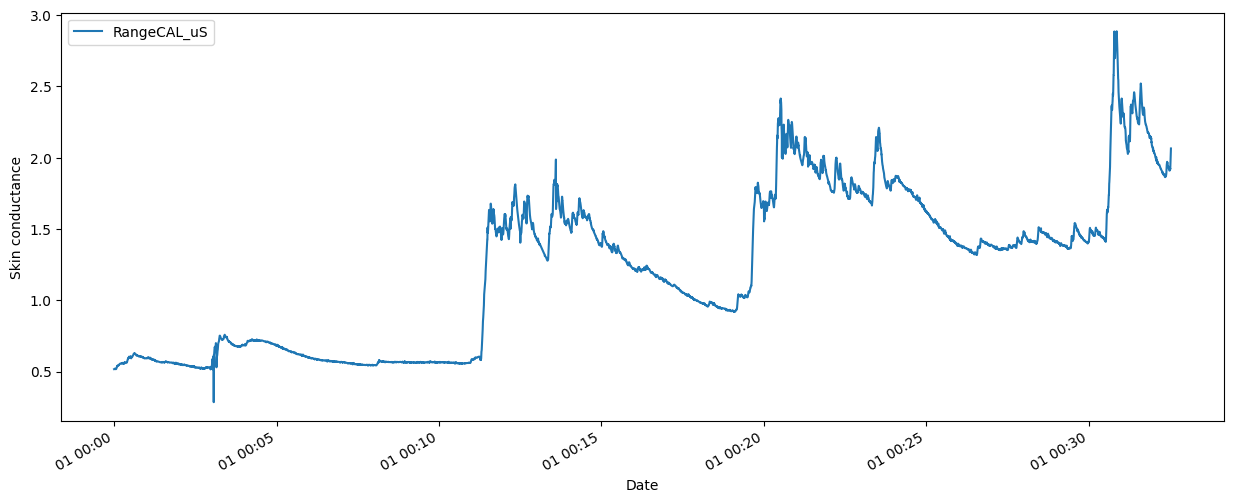

In [89]:
ax = df_co2.plot(figsize=(15, 6))
ax.set_xlabel('Date')
ax.set_ylabel('Skin conductance')
plt.show()

Because this takes long to run depending on hardware, change offsetTime to the runtime of the first data cleaning block in minutes

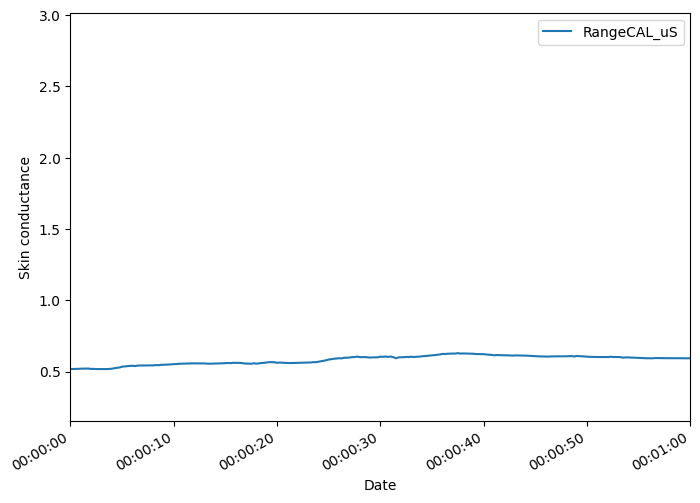

In [90]:

ax = df_co2.plot(figsize=(8, 6))
ax.set_xlabel('Date')
ax.set_ylabel('Skin conductance')
plt.xlim([startTime,startTime+pd.DateOffset(minutes=1)])
# plt.ylim([335,345])
plt.show()

## Cleaning the data

In [91]:
# The 'MS' string groups the data in buckets by start of the month
df_co2 = df_co2['RangeCAL_uS'].resample('S').mean()

# The term bfill means that we use the value before filling in missing values
df_co2 = df_co2.fillna(df_co2.bfill())

print(df_co2)

date
1970-01-01 00:00:00    0.518371
1970-01-01 00:00:01    0.520702
1970-01-01 00:00:02    0.518038
1970-01-01 00:00:03    0.517483
1970-01-01 00:00:04    0.524587
                         ...   
1970-01-01 00:32:27    1.929304
1970-01-01 00:32:28    1.917216
1970-01-01 00:32:29    1.912088
1970-01-01 00:32:30    1.926007
1970-01-01 00:32:31    2.024908
Freq: S, Name: RangeCAL_uS, Length: 1952, dtype: float64


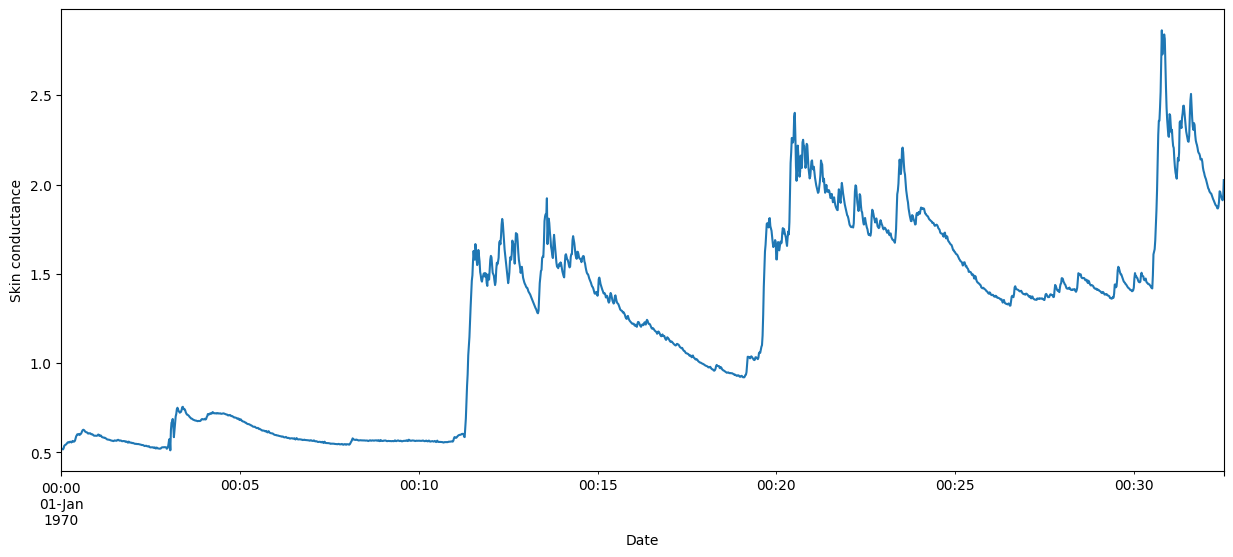

In [92]:
ax = df_co2.plot(figsize=(15, 6))
ax.set_xlabel('Date')
ax.set_ylabel('Skin conductance')
plt.show()

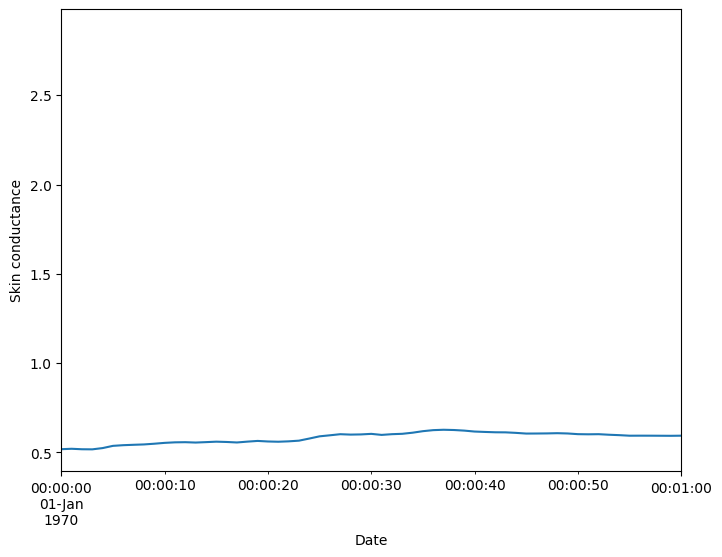

In [93]:
ax = df_co2.plot(figsize=(8, 6))
ax.set_xlabel('Date')
ax.set_ylabel('Skin conductance')
plt.xlim([startTime,startTime+pd.DateOffset(minutes=1)])
# plt.ylim([335,345])
plt.show()

In [94]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [95]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_co2,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic)) 
        except:
            continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70960D+00    |proj g|=  3.19797D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      4      1     0     0   8.160D-08   1.710D+00
  F =   1.7096010106760537     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:6676.282345679314
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variab

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.10087D+00    |proj g|=  8.32969D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     11      1     0     0   2.853D-08   1.101D+00
  F =   1.1008651426461211     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4301.777516890457
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.70379D-01    |proj g|=  4.36638D-02


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2     21      1     0     0   2.918D-04  -4.704D-01
  F = -0.47038968779783147     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-1834.401341162734
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.56523D-01    |proj g|=  4.08298D+00


 This problem is unconstrained.



At iterate    5    f= -3.64748D-01    |proj g|=  1.32778D+00

At iterate   10    f= -4.65825D-01    |proj g|=  2.96742D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     12     16      1     0     0   2.131D-07  -4.658D-01
  F = -0.46582547205487151     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-1814.5826429022184
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.70879D-01    |proj g|=  4.37802D-04

          

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.62169D+00    |proj g|=  4.11996D+01


 This problem is unconstrained.



At iterate    5    f= -4.63033D-01    |proj g|=  5.75985D-01

At iterate   10    f= -4.71712D-01    |proj g|=  4.02517D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     27      1     0     0   4.025D-04  -4.717D-01
  F = -0.47171244385593214     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-1835.5653808135592
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.65953D-01    |proj g|=  4.33325D-04


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     15      1     0     0   4.333D-04  -4.660D-01
  F = -0.46595346957931605     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-1815.0823452376499
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.55109D-02    |proj g|=  5.04587D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -4.53709D-01    |proj g|=  1.56750D+00

At iterate   10    f= -4.64118D-01    |proj g|=  6.60211D-03

At iterate   15    f= -4.65099D-01    |proj g|=  4.54534D-01

At iterate   20    f= -4.66985D-01    |proj g|=  9.16198D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     38      1     0     0   2.038D-05  -4.670D-01
  F = -0.46698530314427317     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-1817.1106234752424
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

A

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.02466D+00    |proj g|=  4.73916D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     17      1     0     0   6.352D-05   1.025D+00
  F =   1.0245177040029148     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4003.7171164273796
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.05230D+00    |proj g|=  7.34046D-01

At iterate    5    f=  4.85078D-01    |proj g|=  3.71534D-01

At iterate 

 This problem is unconstrained.



At iterate    5    f= -9.82222D-01    |proj g|=  1.52829D+00

At iterate   10    f= -1.09299D+00    |proj g|=  7.89287D-01

At iterate   15    f= -1.09763D+00    |proj g|=  7.22331D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     17     43      1     0     0   7.651D-04  -1.098D+00
  F =  -1.0976273682005635     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-4281.137245455
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -9.47430D-01    |proj g|=  2.65052D-01

At iterate   10    f= -1.08315D+00    |proj g|=  7.82555D-01

At iterate   15    f= -1.09008D+00    |proj g|=  5.27025D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     31      1     0     0   2.606D-05  -1.090D+00
  F =  -1.0900794120036288     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-4249.670024462167
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate 

 This problem is unconstrained.



At iterate    5    f= -1.04532D+00    |proj g|=  2.30334D+00

At iterate   10    f= -1.09898D+00    |proj g|=  3.21804D-02

At iterate   15    f= -1.09898D+00    |proj g|=  5.40262D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     39      2     1     0   5.403D-05  -1.099D+00
  F =  -1.0989837966290432     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-4284.432742039785
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10




   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50222D+00    |proj g|=  7.36356D-01

At iterate    5    f= -9.18643D-01    |proj g|=  4.04567D+00

At iterate   10    f= -1.09415D+00    |proj g|=  1.82562D-01

At iterate   15    f= -1.09919D+00    |proj g|=  2.24873D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     36      1     0     0   6.601D-05  -1.099D+00
  F =  -1.0991894536926563     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-4283.2356272161305
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision =

 This problem is unconstrained.



At iterate    5    f= -9.74403D-01    |proj g|=  1.20176D+00

At iterate   10    f= -1.08968D+00    |proj g|=  6.98568D-01

At iterate   15    f= -1.09046D+00    |proj g|=  5.87367D-02

At iterate   20    f= -1.09061D+00    |proj g|=  1.43912D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     30      1     0     0   6.201D-06  -1.091D+00
  F =  -1.0906057148740507     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-4251.724710868294
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At

 This problem is unconstrained.



At iterate    5    f= -8.68850D-01    |proj g|=  4.22220D+00

At iterate   10    f= -9.64034D-01    |proj g|=  7.17992D-01

At iterate   15    f= -1.03391D+00    |proj g|=  2.26544D+00

At iterate   20    f= -1.08784D+00    |proj g|=  1.95868D-03

At iterate   25    f= -1.08786D+00    |proj g|=  6.69676D-02

At iterate   30    f= -1.08858D+00    |proj g|=  7.85503D-01

At iterate   35    f= -1.09059D+00    |proj g|=  2.45239D-02

At iterate   40    f= -1.09065D+00    |proj g|=  5.49834D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     41     59      1     0     0   1.173D-04  -1.091D+00
  F =  -1.09065497638

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f= -2.18240D+00    |proj g|=  5.23345D-02

At iterate   10    f= -2.18244D+00    |proj g|=  1.79228D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     17      1     0     0   3.966D-04  -2.182D+00
  F =  -2.1824435253787122     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-8516.259523078492
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.80218D+00    |proj g|=  1.76073D-01

           

 This problem is unconstrained.
 This problem is unconstrained.


SARIMAX(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-7033.780501153208
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.09391D+00    |proj g|=  7.14426D+00

At iterate    5    f= -2.11094D+00    |proj g|=  1.01769D+00

At iterate   10    f= -2.13939D+00    |proj g|=  6.37925D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     21      1     0     0   3.364D-03  -2.152D+00
  F =  -2.1522620675663560     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(0, 1

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     17      1     0     0   1.376D-02  -2.183D+00
  F =  -2.1834779386514218     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-8520.29787249515
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.18204D+00    |proj g|=  4.48777D-01


 This problem is unconstrained.



At iterate    5    f= -2.18208D+00    |proj g|=  6.66883D-02

At iterate   10    f= -2.18209D+00    |proj g|=  6.29530D-03

At iterate   15    f= -2.18210D+00    |proj g|=  6.74052D-02

At iterate   20    f= -2.18250D+00    |proj g|=  6.39822D-01

At iterate   25    f= -2.18285D+00    |proj g|=  3.24073D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     44      1     0     0   8.213D-05  -2.183D+00
  F =  -2.1828472821533476     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-8515.835789526669



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.93606D+00    |proj g|=  5.07451D-03
  ys=-7.958E-10  -gs= 1.427E-08 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2     27      2     1     0   5.130D-03  -1.936D+00
  F =  -1.9360564763026491     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMAX(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-7554.364483485542
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.06467D+00    |proj g|=  4.37321D+00


 This problem is unconstrained.



At iterate    5    f= -2.07109D+00    |proj g|=  1.21839D+00

At iterate   10    f= -2.11149D+00    |proj g|=  8.61783D+00

At iterate   15    f= -2.13860D+00    |proj g|=  2.19350D-01

At iterate   20    f= -2.15346D+00    |proj g|=  7.84357D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     65      2     0     0   1.127D-04  -2.153D+00
  F =  -2.1534573947530169     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


SARIMAX(0, 1, 0)x(1, 1, 1, 12)12 - AIC:-8401.097669115778
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.30593D+00    |proj g|=  6.35253D-02

At iterate    5    f= -2.30716D+00    |proj g|=  1.42352D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     14      1     0     0   7.896D-03  -2.307D+00
  F =  -2.3071563309469432     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-9003.138316016866


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.29084D+00    |proj g|=  6.53506D-02

At iterate    5    f= -2.29214D+00    |proj g|=  2.19057D-01

At iterate   10    f= -2.29215D+00    |proj g|=  3.13370D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     22      1     0     0   1.635D-03  -2.292D+00
  F =  -2.2921500947758093     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(0, 1, 1)x(0, 0, 1, 12)12 - AIC:-8942.55397000476
RUNNING THE L

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     20      1     0     0   3.203D-04  -1.918D+00
  F =  -1.9176752472821028     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(0, 1, 1)x(0, 1, 0, 12)12 - AIC:-7482.604165389329
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.13587D+00    |proj g|=  1.34143D+01


 This problem is unconstrained.



At iterate    5    f= -2.23774D+00    |proj g|=  8.13534D+00

At iterate   10    f= -2.26245D+00    |proj g|=  2.53254D-01

At iterate   15    f= -2.26247D+00    |proj g|=  2.69213D-02

At iterate   20    f= -2.26247D+00    |proj g|=  1.33617D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     30      1     0     0   9.557D-04  -2.262D+00
  F =  -2.2624745440790663     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-8826.700620084675
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     18      1     0     0   3.901D-06  -2.295D+00
  F =  -2.2948755982081530     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-8953.194335404629
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.29071D+00    |proj g|=  6.96772D-02


 This problem is unconstrained.



At iterate    5    f= -2.29193D+00    |proj g|=  7.61042D-01

At iterate   10    f= -2.29203D+00    |proj g|=  2.81364D-03

At iterate   15    f= -2.29204D+00    |proj g|=  1.78680D-02

At iterate   20    f= -2.29220D+00    |proj g|=  4.31712D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     48      1     0     0   1.574D-04  -2.292D+00
  F =  -2.2921990017172900     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 - AIC:-8940.7449027043
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -2.05838D+00    |proj g|=  6.43924D-01

At iterate   10    f= -2.05921D+00    |proj g|=  2.77140D-03

At iterate   15    f= -2.05921D+00    |proj g|=  2.46580D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -2.05921D+00    |proj g|=  9.49552D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     64      2     0     0   9.496D-03  -2.059D+00
  F =  -2.0592105888569239     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(0, 1, 1)x(1, 1, 0, 12)12 - AIC:-8033.15813889743



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.11552D+00    |proj g|=  1.22262D+01


 This problem is unconstrained.



At iterate    5    f= -2.18341D+00    |proj g|=  1.10151D+00

At iterate   10    f= -2.22491D+00    |proj g|=  1.26914D+01

At iterate   15    f= -2.24469D+00    |proj g|=  4.42403D-01

At iterate   20    f= -2.26250D+00    |proj g|=  8.48028D-01

At iterate   25    f= -2.26309D+00    |proj g|=  1.48643D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     40      1     0     0   7.073D-05  -2.263D+00
  F =  -2.2631601536876249     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(0, 1, 1)x(1, 1, 1, 12)12 - AIC:-8827.377239996487
RUNNING THE L-BFGS-B CODE

           * * *

Machine pr

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -1.95694D+00    |proj g|=  3.19727D+00

At iterate   10    f= -2.08647D+00    |proj g|=  7.76477D+00

At iterate   15    f= -2.13657D+00    |proj g|=  2.98935D+00

At iterate   20    f= -2.15905D+00    |proj g|=  7.56446D+00

At iterate   25    f= -2.16745D+00    |proj g|=  1.49255D+01

At iterate   30    f= -2.17177D+00    |proj g|=  8.35356D-01

At iterate   35    f= -2.17419D+00    |proj g|=  2.58744D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -2.17529D+00    |proj g|=  4.91187D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     42    105      2     0     0   3.972D+00  -2.175D+00
  F =  -2.1752884638662606     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 0, 0)x(0, 0, 1, 12)12 - AIC:-8486.326162933881
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.81183D+00    |proj g|=  7.13054D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments expl

 This problem is unconstrained.



At iterate    5    f= -1.41748D+00    |proj g|=  2.24660D+00

At iterate   10    f= -1.86368D+00    |proj g|=  2.28177D+00

At iterate   15    f= -2.15341D+00    |proj g|=  3.50594D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     32      1     0     0   5.097D-04  -2.154D+00
  F =  -2.1537423597719068     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 0, 0)x(0, 1, 1, 12)12 - AIC:-8402.210172549523
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate 

 This problem is unconstrained.



At iterate   15    f= -2.05467D+00    |proj g|=  1.39810D+01

At iterate   20    f= -2.18366D+00    |proj g|=  1.19697D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     34      1     0     0   3.613D-05  -2.184D+00
  F =  -2.1836681593467699     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 0, 0)x(1, 0, 0, 12)12 - AIC:-8519.04049408979


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34864D+01    |proj g|=  1.16603D+03

At iterate    5    f= -1.60089D+00    |proj g|=  6.38016D+00

At iterate   10    f= -2.12821D+00    |proj g|=  5.21746D+00

At iterate   15    f= -2.18110D+00    |proj g|=  2.33824D-01

At iterate   20    f= -2.18114D+00    |proj g|=  6.09437D-02

At iterate   25    f= -2.18258D+00    |proj g|=  4.23014D-01

At iterate   30    f= -2.18443D+00    |proj g|=  2.04869D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f= -1.82916D+00    |proj g|=  4.52573D+00

At iterate   10    f= -1.94062D+00    |proj g|=  4.58466D-01

At iterate   15    f= -1.94103D+00    |proj g|=  5.27238D-01

At iterate   20    f= -1.94120D+00    |proj g|=  2.67644D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     34      1     0     0   3.503D-02  -1.941D+00
  F =  -1.9412047622877702     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 0, 0)x(1, 1, 0, 12)12 - AIC:-7572.463391971455
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At

 This problem is unconstrained.



At iterate    5    f= -1.32230D+00    |proj g|=  2.19030D+00

At iterate   10    f= -1.89156D+00    |proj g|=  3.16732D+00

At iterate   15    f= -1.95217D+00    |proj g|=  7.45224D+00

At iterate   20    f= -1.97181D+00    |proj g|=  2.20820D+00

At iterate   25    f= -2.00412D+00    |proj g|=  6.37143D+00

At iterate   30    f= -2.08670D+00    |proj g|=  6.39505D+00

At iterate   35    f= -2.14723D+00    |proj g|=  8.93751D-01

At iterate   40    f= -2.15482D+00    |proj g|=  6.98717D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     43     83      2     0     0   8.251D-05  -2.155D+00
  F =  -2.1548166108589322     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 0, 0)x(1, 1, 1, 12)12 - AIC:-8404.40404879327
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.30800D+00    |proj g|=  4.68968D-01

At iterate    5    f= -2.30805D+00    |proj g|=  2.48594D-01

At iterate   10    f= -2.30842D+00    |proj g|=  8.89099D-01


 This problem is unconstrained.



At iterate   15    f= -2.30858D+00    |proj g|=  1.08614D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     39      1     0     0   1.086D-03  -2.309D+00
  F =  -2.3085812988626353     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 0, 1)x(0, 0, 0, 12)12 - AIC:-9006.701390759728
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.97352D+00    |proj g|=  1.97011D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f= -2.05947D+00    |proj g|=  3.08685D-01

At iterate   10    f= -2.06417D+00    |proj g|=  1.54525D+00

At iterate   15    f= -2.20428D+00    |proj g|=  2.92276D+00

At iterate   20    f= -2.24903D+00    |proj g|=  9.60987D+00

At iterate   25    f= -2.26075D+00    |proj g|=  8.83800D+00

At iterate   30    f= -2.26115D+00    |proj g|=  3.10548D-01

At iterate   35    f= -2.26220D+00    |proj g|=  1.83698D-01

At iterate   40    f= -2.26774D+00    |proj g|=  2.96769D+01

At iterate   45    f= -2.28443D+00    |proj g|=  2.10563D+01

At iterate   50    f= -2.28683D+00    |proj g|=  1.77821D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f= -1.93316D+00    |proj g|=  2.84815D-01

At iterate   15    f= -1.93319D+00    |proj g|=  3.01309D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     24      1     0     0   7.985D-04  -1.933D+00
  F =  -1.9331913081911776     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 0, 1)x(0, 1, 0, 12)12 - AIC:-7541.178867178357
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.06321D+00    |proj g|=  4.78697D+01


 This problem is unconstrained.



At iterate    5    f= -1.44227D+00    |proj g|=  2.84325D+00

At iterate   10    f= -1.96247D+00    |proj g|=  9.48259D+00

At iterate   15    f= -2.10852D+00    |proj g|=  1.26625D+01

At iterate   20    f= -2.25697D+00    |proj g|=  1.70954D+00

At iterate   25    f= -2.26211D+00    |proj g|=  1.02966D+00

At iterate   30    f= -2.26422D+00    |proj g|=  4.21163D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     55      1     0     0   1.655D-03  -2.264D+00
  F =  -2.2642181205385405     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 0, 1)x(0, 1, 1, 12)12 - AIC:-8831.507542

 This problem is unconstrained.



At iterate   10    f= -1.99273D+00    |proj g|=  3.47841D+00

At iterate   15    f= -2.25813D+00    |proj g|=  1.63305D+01

At iterate   20    f= -2.29475D+00    |proj g|=  3.20504D-01

At iterate   25    f= -2.29493D+00    |proj g|=  5.38138D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     37      1     0     0   5.674D-04  -2.295D+00
  F =  -2.2949307621718411     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 0, 1)x(1, 0, 0, 12)12 - AIC:-8951.409695518867
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At

 This problem is unconstrained.


  ys=-2.144E+01  -gs= 1.036E+00 BFGS update SKIPPED

At iterate    5    f= -1.25450D+00    |proj g|=  2.09923D+00

At iterate   10    f= -1.84592D+00    |proj g|=  3.86244D+00

At iterate   15    f= -2.26565D+00    |proj g|=  3.81340D+00

At iterate   20    f= -2.28390D+00    |proj g|=  4.05912D-01

At iterate   25    f= -2.28624D+00    |proj g|=  2.25817D+00

At iterate   30    f= -2.28994D+00    |proj g|=  4.53182D-02

At iterate   35    f= -2.29003D+00    |proj g|=  4.45036D-01

At iterate   40    f= -2.29275D+00    |proj g|=  1.48164D+00

At iterate   45    f= -2.29364D+00    |proj g|=  8.20856D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate    5    f= -1.97213D+00    |proj g|=  1.01440D+01

At iterate   10    f= -2.06764D+00    |proj g|=  3.67092D-02

At iterate   15    f= -2.06767D+00    |proj g|=  1.94517D-01

At iterate   20    f= -2.06769D+00    |proj g|=  5.60199D-02

At iterate   25    f= -2.06775D+00    |proj g|=  1.18491D-02

At iterate   30    f= -2.06776D+00    |proj g|=  6.96880D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     46      1     0     0   6.945D-03  -2.068D+00
  F =  -2.0677550233105877     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 0, 1)x(1, 1, 0, 12)12 - AIC:-8064.515611

 This problem is unconstrained.



At iterate    5    f= -1.69981D+00    |proj g|=  1.64582D+01

At iterate   10    f= -2.00371D+00    |proj g|=  1.12029D+00

At iterate   15    f= -2.09699D+00    |proj g|=  1.86698D-01

At iterate   20    f= -2.15247D+00    |proj g|=  9.12696D+00

At iterate   25    f= -2.23822D+00    |proj g|=  3.93117D+00

At iterate   30    f= -2.24198D+00    |proj g|=  1.16580D+00

At iterate   35    f= -2.25697D+00    |proj g|=  5.79797D+00

At iterate   40    f= -2.26476D+00    |proj g|=  2.23205D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     59      1     0     0   3.271D-04  -2.265D+00
  F =  -2.26476405325

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -2.28820D+00    |proj g|=  1.34151D-01

At iterate   10    f= -2.28830D+00    |proj g|=  1.32705D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     16      1     0     0   1.293D-03  -2.288D+00
  F =  -2.2882984973918954     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 1, 0)x(0, 0, 1, 12)12 - AIC:-8927.51733381796
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.91664D+00    |proj g|=  8.86481D-03


 This problem is unconstrained.


  ys=-1.658E-15  -gs= 8.019E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3     59      2     1     0   7.212D-03  -1.917D+00
  F =  -1.9166388224315638     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 1, 0)x(0, 1, 0, 12)12 - AIC:-7478.557962772825
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.13716D+00    |proj g|=  1.33518D+01


 This problem is unconstrained.



At iterate    5    f= -2.22126D+00    |proj g|=  1.17115D+00

At iterate   10    f= -2.25141D+00    |proj g|=  7.36850D+00

At iterate   15    f= -2.25913D+00    |proj g|=  1.35844D-01

At iterate   20    f= -2.25916D+00    |proj g|=  1.81897D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     31      1     0     0   1.263D-02  -2.259D+00
  F =  -2.2591630111930749     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 1, 0)x(0, 1, 1, 12)12 - AIC:-8813.772395697764
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At

 This problem is unconstrained.


SARIMAX(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-8927.522385661807
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.28820D+00    |proj g|=  9.29667D-02


 This problem is unconstrained.



At iterate    5    f= -2.28821D+00    |proj g|=  2.18637D-01

At iterate   10    f= -2.28830D+00    |proj g|=  1.24768D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     16      1     0     0   4.089D-04  -2.288D+00
  F =  -2.2882971596500430     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 1, 0)x(1, 0, 1, 12)12 - AIC:-8925.512111273767
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.03932D+00    |proj g|=  7.66854D+00


 This problem is unconstrained.



At iterate    5    f= -2.06190D+00    |proj g|=  1.46706D-01

At iterate   10    f= -2.06252D+00    |proj g|=  1.13075D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     39      1     0     0   4.391D-03  -2.063D+00
  F =  -2.0625275719608389     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 1, 0)x(1, 1, 0, 12)12 - AIC:-8046.107640935115
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.11749D+00    |proj g|=  1.22016D+01


 This problem is unconstrained.



At iterate    5    f= -2.18459D+00    |proj g|=  9.86056D-01

At iterate   10    f= -2.22072D+00    |proj g|=  1.30945D+01

At iterate   15    f= -2.24095D+00    |proj g|=  1.19452D+00

At iterate   20    f= -2.24756D+00    |proj g|=  2.98832D+00

At iterate   25    f= -2.25936D+00    |proj g|=  1.24255D-02

At iterate   30    f= -2.25943D+00    |proj g|=  4.20287D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     43      1     0     0   2.579D-05  -2.259D+00
  F =  -2.2594274008223660     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 1, 0)x(1, 1, 1, 12)12 - AIC:-8812.804572

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -2.29595D+00    |proj g|=  1.63659D-01

At iterate   10    f= -2.29600D+00    |proj g|=  8.71047D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     16      1     0     0   2.284D-03  -2.296D+00
  F =  -2.2960010492154757     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 1, 1)x(0, 0, 1, 12)12 - AIC:-8955.588096137217
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.92264D+00    |proj g|=  4.08777D-02


 This problem is unconstrained.



At iterate    5    f= -1.92265D+00    |proj g|=  1.19023D-01

At iterate   10    f= -1.92267D+00    |proj g|=  7.28179D-03

At iterate   15    f= -1.92273D+00    |proj g|=  2.15496D-01

At iterate   20    f= -1.92278D+00    |proj g|=  2.49975D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     28      1     0     0   2.500D-03  -1.923D+00
  F =  -1.9227824483320828     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 1, 1)x(0, 1, 0, 12)12 - AIC:-7500.5426782884515
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

A

 This problem is unconstrained.



At iterate    5    f= -2.22784D+00    |proj g|=  1.25873D+00

At iterate   10    f= -2.25848D+00    |proj g|=  7.26169D+00

At iterate   15    f= -2.26633D+00    |proj g|=  1.07087D-01

At iterate   20    f= -2.26639D+00    |proj g|=  1.18537D-02

At iterate   25    f= -2.26641D+00    |proj g|=  1.72593D-01

At iterate   30    f= -2.26663D+00    |proj g|=  1.05491D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     43      1     0     0   1.103D-03  -2.267D+00
  F =  -2.2666328951877688     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 1, 1)x(0, 1, 1, 12)12 - AIC:-8840.934822

 This problem is unconstrained.



At iterate   10    f= -2.29739D+00    |proj g|=  4.30202D-02

At iterate   15    f= -2.29739D+00    |proj g|=  3.36528D-02

At iterate   20    f= -2.29739D+00    |proj g|=  2.42374D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     29      1     0     0   6.888D-06  -2.297D+00
  F =  -2.2973942540033070     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-8961.02716762891
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate  

 This problem is unconstrained.



At iterate    5    f= -2.29591D+00    |proj g|=  2.43086D-01

At iterate   10    f= -2.29596D+00    |proj g|=  1.58801D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     15      1     0     0   1.585D-03  -2.296D+00
  F =  -2.2959566258826376     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMAX(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-8953.414667445817
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.04525D+00    |proj g|=  7.69609D+00


 This problem is unconstrained.



At iterate    5    f= -2.06766D+00    |proj g|=  1.30810D-01

At iterate   10    f= -2.06811D+00    |proj g|=  4.53328D-01

At iterate   15    f= -2.06816D+00    |proj g|=  2.67865D-01

At iterate   20    f= -2.06821D+00    |proj g|=  1.24369D-01

At iterate   25    f= -2.06823D+00    |proj g|=  1.34547D-01

At iterate   30    f= -2.06834D+00    |proj g|=  1.06542D-02

At iterate   35    f= -2.06834D+00    |proj g|=  1.30463D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     57      1     0     0   2.520D-04  -2.068D+00
  F =  -2.0683443139993156     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -2.19094D+00    |proj g|=  1.00529D+00

At iterate   10    f= -2.22777D+00    |proj g|=  1.32536D+01

At iterate   15    f= -2.24819D+00    |proj g|=  8.47192D-01

At iterate   20    f= -2.25137D+00    |proj g|=  3.66871D+00

At iterate   25    f= -2.26506D+00    |proj g|=  1.48967D+00

At iterate   30    f= -2.26689D+00    |proj g|=  3.77631D-02

At iterate   35    f= -2.26718D+00    |proj g|=  2.23657D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     57      1     0     0   1.454D-03  -2.267D+00
  F =  -2.2671854242471632     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

In [96]:
mod = sm.tsa.statespace.SARIMAX(df_co2,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.12343D+00    |proj g|=  1.23073D+01


 This problem is unconstrained.



At iterate    5    f= -2.19094D+00    |proj g|=  1.00529D+00

At iterate   10    f= -2.22777D+00    |proj g|=  1.32536D+01

At iterate   15    f= -2.24819D+00    |proj g|=  8.47192D-01

At iterate   20    f= -2.25137D+00    |proj g|=  3.66871D+00

At iterate   25    f= -2.26506D+00    |proj g|=  1.48967D+00

At iterate   30    f= -2.26689D+00    |proj g|=  3.77631D-02

At iterate   35    f= -2.26718D+00    |proj g|=  2.23657D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     57      1     0     0   1.454D-03  -2.267D+00
  F =  -2.2671854242471632     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

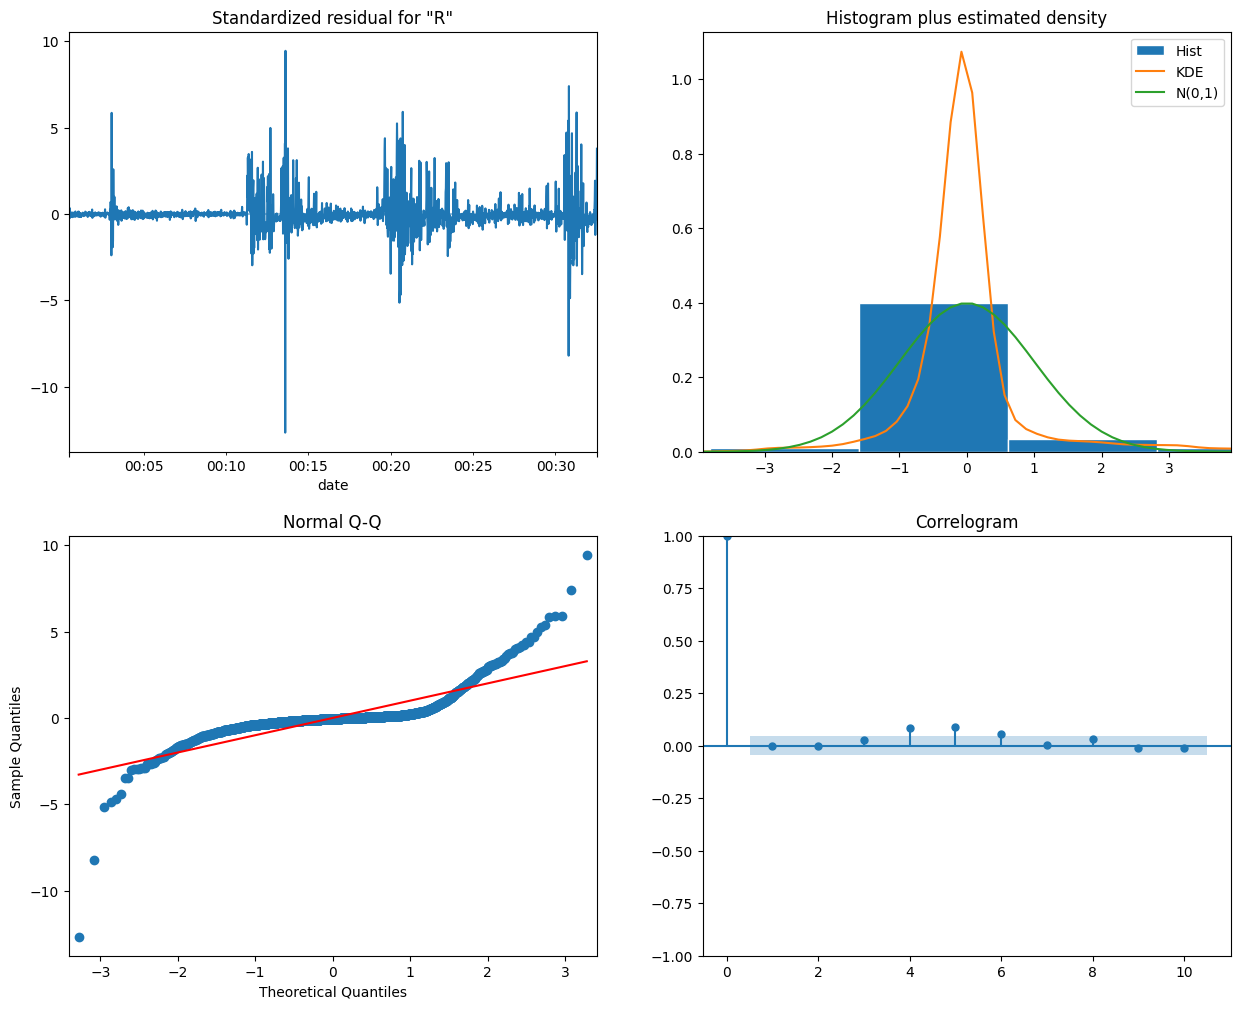

In [97]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

### *This part is copied over from the tutorial notebook and modified to reflect our data*

Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

In this case, our model diagnostics suggests that the model residuals are not normally distributed based on the following:

* In the top right plot, we see that the red `KDE` line does not follow the `N(0,1)` line closely (where `N(0,1)`) is the standard notation for a normal distribution with mean `0` and standard deviation of `1`). This is a good indication that the residuals are not normally distributed.
* The `qq-plot` on the bottom left shows that the ordered distribution of residuals (blue dots) does not follow the linear trend of the samples taken from a standard normal distribution with `N(0, 1)`. Again, this is a strong indication that the residuals are not normally distributed.

Those observations lead us to conclude that our model does not produce a satisfactory fit that could help us understand our time series data and forecast future values. We believe this is because the used dataset does not resemble the data or use case intended for this model.


## Validating forecasts
As concluded in the paragraph above, this model does not suit our use case with our current dataset. As such, it is not relevant to validate the forecasts as we know they will be inaccurate. We will still do so to demonstrate this point. The code below will start the forecasts 15 minutes into the measurements.

In [98]:
pred = results.get_prediction(start=startTime+pd.DateOffset(minutes=15), dynamic=False)
pred_ci = pred.conf_int()

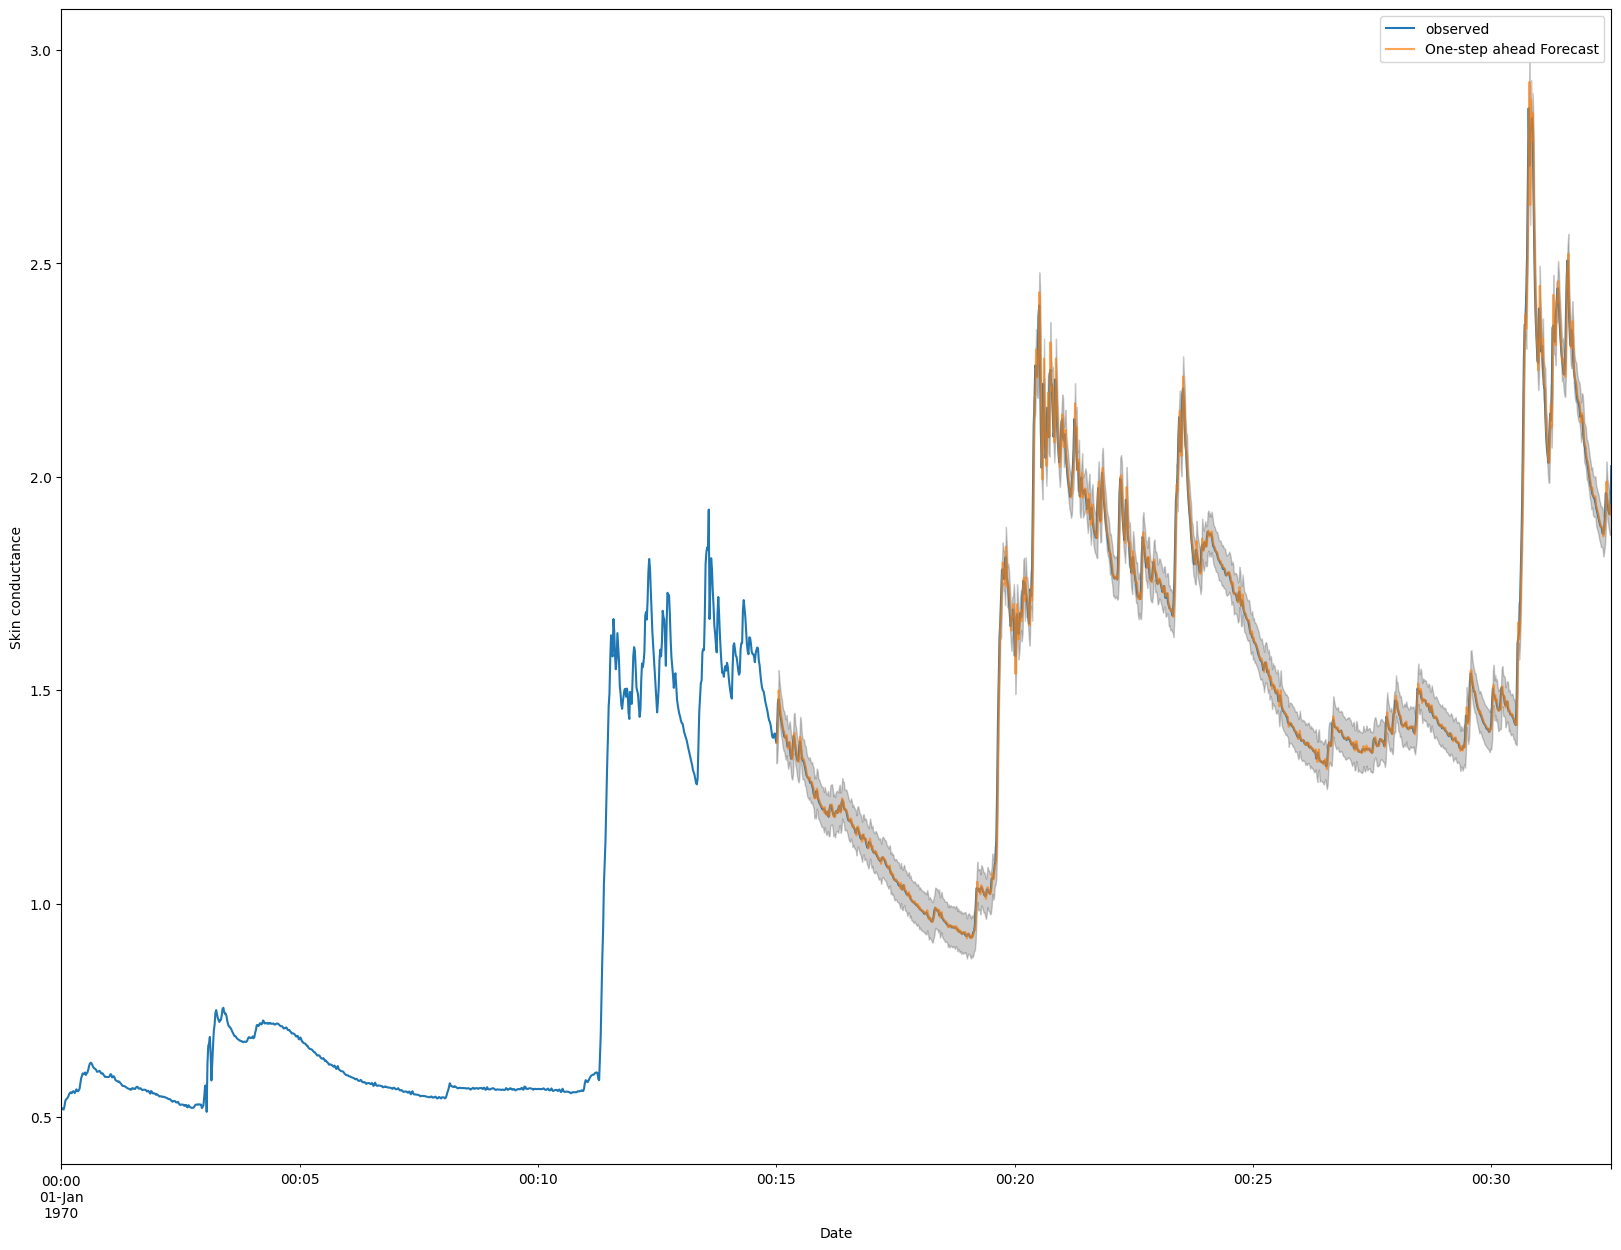

In [99]:
ax = df_co2[startTime:].plot(label='observed', figsize=(20, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Skin conductance')
plt.legend()

plt.show()

The forecasts are not able to deviate much from the observed values, as the measurement frequency is simply too high which means at this scale (almost 7000 measurements) the deviation is negligible when only looking 1 step ahead.

In [100]:
co2_forecasted = pred.predicted_mean
co2_truth = df_co2[startTime+pd.DateOffset(minutes=15):]

# Compute the mean square error
mse = ((co2_forecasted - co2_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.0


In [101]:
pred_dynamic = results.get_prediction(start=pd.to_datetime(startTime+pd.DateOffset(minutes=15)), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

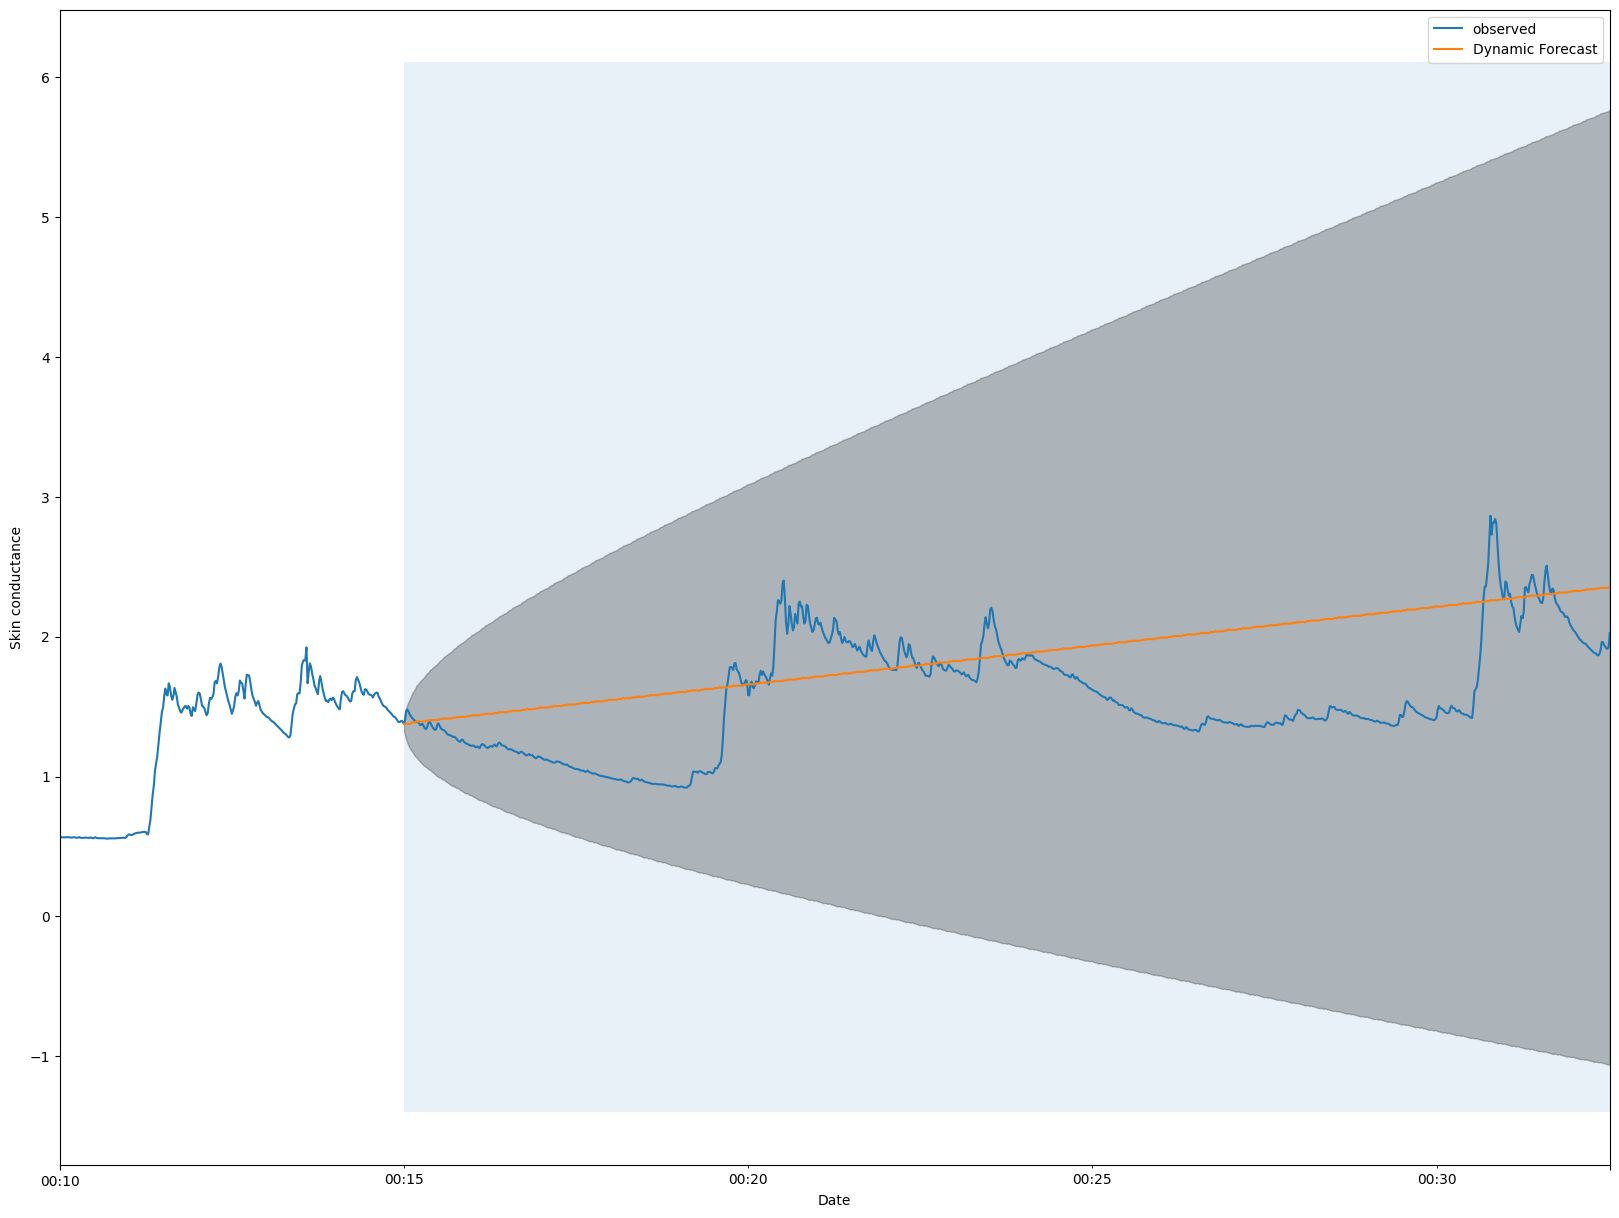

In [106]:
ax = df_co2[startTime+pd.DateOffset(minutes=10):].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime(startTime+pd.DateOffset(minutes=15)), df_co2.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Skin conductance')
plt.legend()
plt.show()

As observable, The forecast has no idea what it is actually doing as the expected linear increase is non existant and the data is not as periodic as with its intended use case.

In [103]:
# Extract the predicted and true values of our time series
co2_forecasted = pred_dynamic.predicted_mean
co2_truth = df_co2[startTime+pd.DateOffset(minutes=15):]

# Compute the mean square error
mse = ((co2_forecasted - co2_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.22


In [104]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

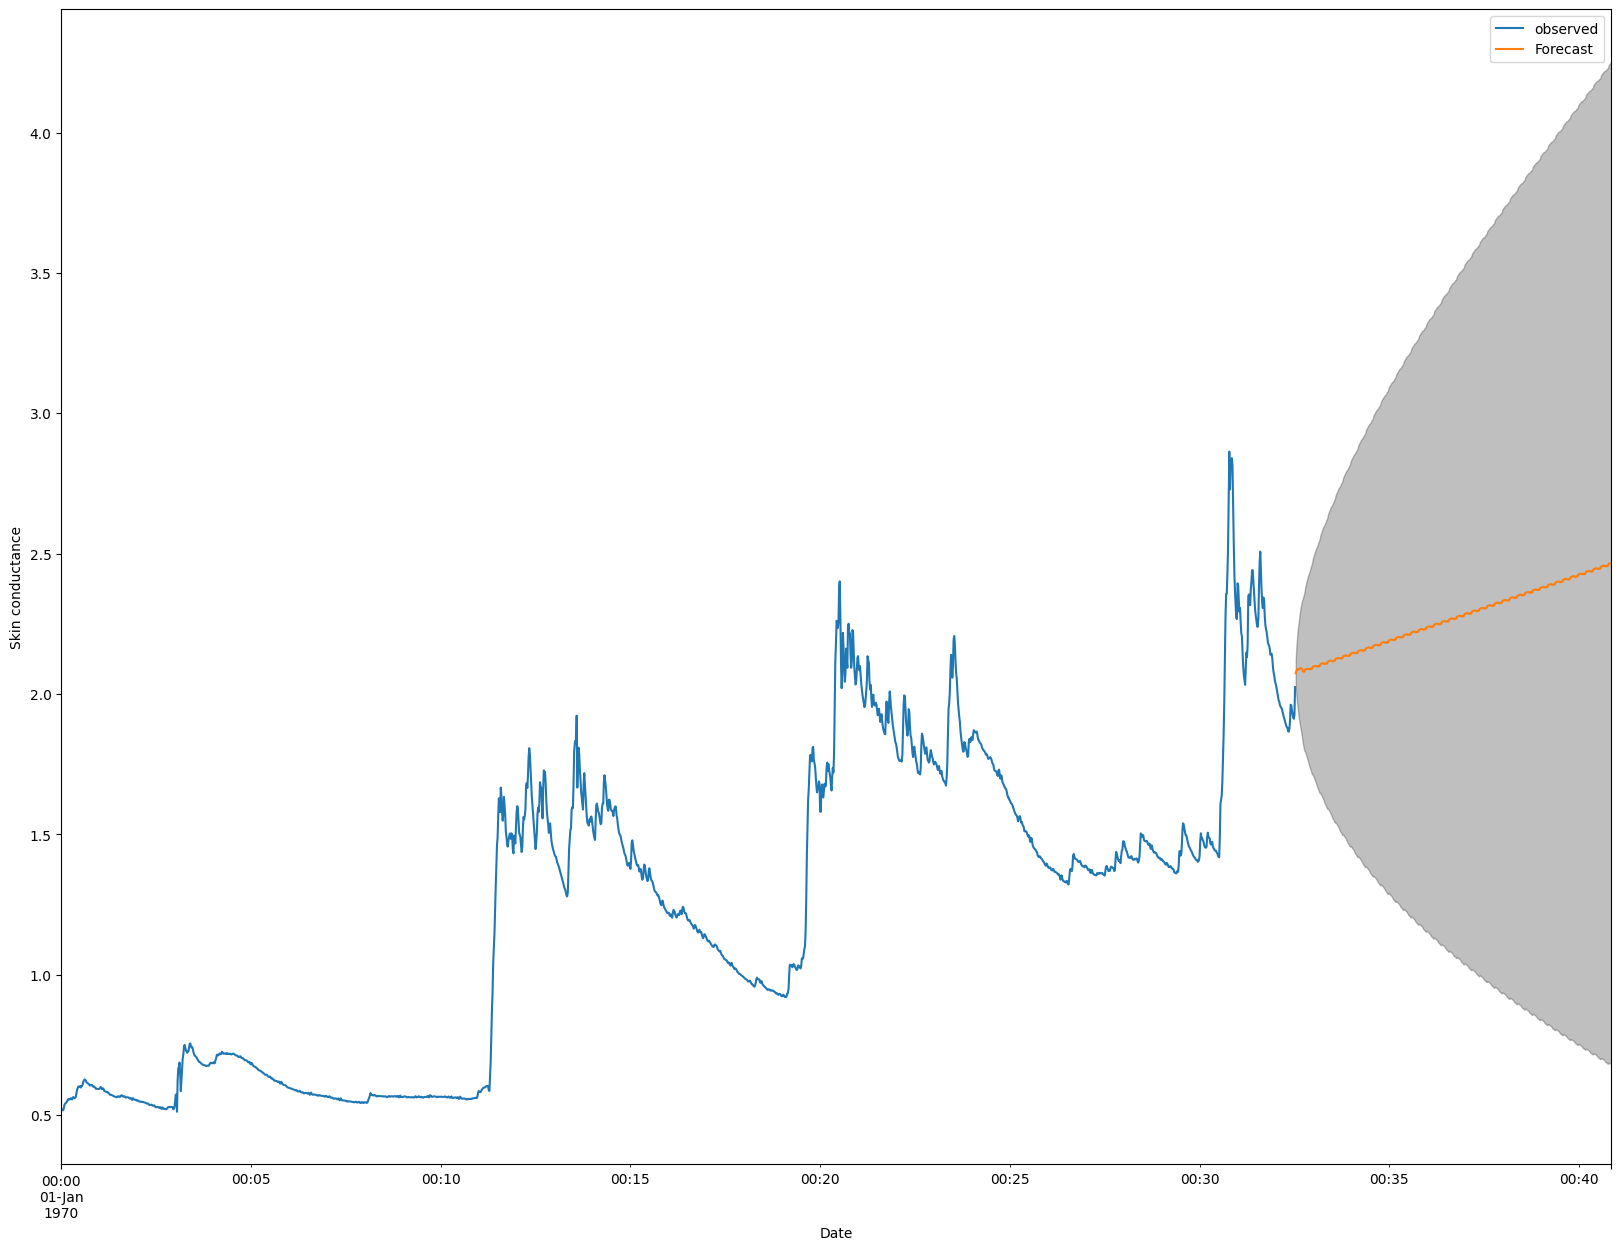

In [105]:
ax = df_co2.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Skin conductance')
plt.legend()
plt.show()

When attempting to predict ahead the same behavior is observed as the forecast completely falls apart when it does not know what to do.

## Conclusion
By following along with this tutorial, we were able to observe how the ARIMA model can predict data in a timeseries if it has a clear periodic pattern. This does not apply to our data and as such we will not be utilising this model type in this project.